# Scrape Data with Scraper

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ScraperFC
from sklearn.linear_model import LinearRegression
import ScraperFC as sfc
import traceback
from scipy import stats
import matplotlib.dates as mdates
from datetime import datetime

In [46]:
import numpy as np
import pandas as pd
import ScraperFC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import ScraperFC as sfc
import traceback

# Scraping Data

In [6]:
scraper = sfc.FBRef()
try:
    out = scraper.scrape_league_table(2023, 'EPL')
except:
    traceback.print_exc()
scraper.close()
out

Scraping 2023 EPL league table


,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,5,5,94,33,61,89,2.34,78.6,32.1,46.5,1.22,53249,Erling Haaland - 36,Ederson,→ Champions League via league finish
1,2,Arsenal,38,26,6,6,88,43,45,84,2.21,71.7,42.0,29.7,0.78,60191,"Martin Ødegaard, Gabriel Martinelli - 15",Aaron Ramsdale,→ Champions League via league finish
2,3,Manchester Utd,38,23,6,9,58,43,15,75,1.97,67.7,50.4,17.3,0.45,73671,Marcus Rashford - 17,David de Gea,→ Champions League via league finish
3,4,Newcastle Utd,38,19,14,5,68,33,35,71,1.87,71.9,39.5,32.3,0.85,52127,Callum Wilson - 18,Nick Pope,→ Champions League via league finish
4,5,Liverpool,38,19,10,9,75,47,28,67,1.76,72.6,50.9,21.7,0.57,53163,Mohamed Salah - 19,Alisson,→ Europa League via league finish
5,6,Brighton,38,18,8,12,72,53,19,62,1.63,73.3,50.2,23.1,0.61,31477,Alexis Mac Allister - 10,Robert Sánchez,→ Europa League via league finish
6,7,Aston Villa,38,18,7,13,51,46,5,61,1.61,50.3,52.5,-2.2,-0.06,39485,Ollie Watkins - 15,Emiliano Martínez,→ Europa Conference League via league finish
7,8,Tottenham,38,18,6,14,70,63,7,60,1.58,57.0,49.6,7.4,0.20,61585,Harry Kane - 30,Hugo Lloris,NaN
8,9,Brentford,38,15,14,9,58,46,12,59,1.55,56.6,49.8,6.7,0.18,17078,Ivan Toney - 20,David Raya,NaN
9,10,Fulham,38,15,7,16,55,53,2,52,1.37,46.2,63.6,-17.4,-0.46,23746,Aleksandar Mitrović - 14,Bernd Leno,NaN


In [7]:
years = [2022, 2021, 2020, 2019, 2018]  
all_data = []  

for year in years:
    try:
        
        year_data = scraper.scrape_league_table(year, 'EPL')
        year_data['Year'] = year  
        all_data.append(year_data)
    except Exception as e:
        print(f"Der opstod en fejl ved hentning af data for {year}: {e}")

combined_data = pd.concat(all_data, ignore_index=True)

print(combined_data)

Scraping 2022 EPL league table
Scraping 2021 EPL league table
Scraping 2020 EPL league table
Scraping 2019 EPL league table
Scraping 2018 EPL league table
    Rk            Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
0    1  Manchester City  38  29   6   3  99  26  73   93    2.45  88.7  24.6   
1    2        Liverpool  38  28   8   2  94  26  68   92    2.42  88.7  33.8   
2    3          Chelsea  38  21  11   6  76  33  43   74    1.95  63.4  33.2   
3    4        Tottenham  38  22   5  11  69  40  29   71    1.87  61.2  39.3   
4    5          Arsenal  38  22   3  13  61  48  13   69    1.82  60.5  45.7   
..  ..              ...  ..  ..  ..  ..  ..  ..  ..  ...     ...   ...   ...   
95  16     Huddersfield  38   9  10  19  28  58 -30   37    0.97  31.3  48.5   
96  17      Southampton  38   7  15  16  37  56 -19   36    0.95  39.9  45.2   
97  18     Swansea City  38   8   9  21  28  56 -28   33    0.87  31.6  58.6   
98  19       Stoke City  38   7  12  19  35  

In [8]:
scraper = sfc.FBRef()
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,2001,2000,1999,1998,1997,1996, 1995, 1994, 1993]  # Liste over de år, du vil hente data for

dataframes = {}

for year in years:
    try:
        data = scraper.scrape_league_table(year, 'EPL')
        dataframes[str(year)] = data  
    except Exception as e:
        print(f"Der opstod en fejl ved indhentning af data for {year}: {e}")

#print(dataframes['2022'])

Scraping 2023 EPL league table
Scraping 2022 EPL league table
Scraping 2021 EPL league table
Scraping 2020 EPL league table
Scraping 2019 EPL league table
Scraping 2018 EPL league table
Scraping 2017 EPL league table
Scraping 2016 EPL league table
Scraping 2015 EPL league table
Scraping 2014 EPL league table
Scraping 2013 EPL league table
Scraping 2012 EPL league table
Scraping 2011 EPL league table
Scraping 2010 EPL league table
Scraping 2009 EPL league table
Scraping 2008 EPL league table
Scraping 2007 EPL league table
Scraping 2006 EPL league table
Scraping 2005 EPL league table
Scraping 2004 EPL league table
Scraping 2003 EPL league table
Scraping 2002 EPL league table
Scraping 2001 EPL league table
Scraping 2000 EPL league table
Scraping 1999 EPL league table
Scraping 1998 EPL league table
Scraping 1997 EPL league table
Scraping 1996 EPL league table
Scraping 1995 EPL league table
Scraping 1994 EPL league table
Scraping 1993 EPL league table


In [9]:
print(dataframes['1995'])

    Rk            Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP  Attendance  \
0    1        Blackburn  42  27   8   7  80  39  41   89    2.12       25151   
1    2   Manchester Utd  42  26  10   6  77  29  48   88    2.10       43664   
2    3  Nott'ham Forest  42  22  11   9  72  43  29   77    1.83       22079   
3    4        Liverpool  42  21  11  10  65  37  28   74    1.76       33305   
4    5     Leeds United  42  20  13   9  59  38  21   73    1.74       33433   
5    6    Newcastle Utd  42  20  12  10  67  47  20   72    1.71       34373   
6    7        Tottenham  42  16  14  12  66  58   8   62    1.48       26032   
7    8              QPR  42  17   9  16  61  59   2   60    1.43       14791   
8    9        Wimbledon  42  15  11  16  48  65 -17   56    1.33        9847   
9   10      Southampton  42  12  18  12  61  63  -2   54    1.29       14496   
10  11          Chelsea  42  13  15  14  50  55  -5   54    1.29       20709   
11  12          Arsenal  42  13  12  17 

In [10]:
filtered_dataframes = {}

for year, df in dataframes.items():

    filtered_dataframes[year] = df[['Squad', 'Pts']]


# HHICB and Relative Entropy calculation

In [11]:
hhicb_data = []

for year, df in filtered_dataframes.items():

    df_copy = df.copy()

    total_points = df_copy['Pts'].sum()

    df_copy.loc[:, 'pi'] = df_copy['Pts'] / total_points
    hhicb = len(df_copy) * (df_copy['pi']**2).sum()
    hhicb_data.append({'Year': year, 'HHICB': hhicb})


hhicb_df = pd.DataFrame(hhicb_data)


hhicb_df = hhicb_df.sort_values('Year').reset_index(drop=True)

print(hhicb_df)


    Year     HHICB
0   1993  1.031515
1   1994  1.071300
2   1995  1.078538
3   1996  1.080456
4   1997  1.053184
5   1998  1.053767
6   1999  1.070886
7   2000  1.089279
8   2001  1.068715
9   2002  1.098024
10  2003  1.080925
11  2004  1.082192
12  2005  1.104534
13  2006  1.116473
14  2007  1.087934
15  2008  1.136834
16  2009  1.116166
17  2010  1.126355
18  2011  1.058610
19  2012  1.105428
20  2013  1.113289
21  2014  1.125156
22  2015  1.092657
23  2016  1.084877
24  2017  1.134283
25  2018  1.128875
26  2019  1.146749
27  2020  1.109310
28  2021  1.096998
29  2022  1.128504
30  2023  1.113393


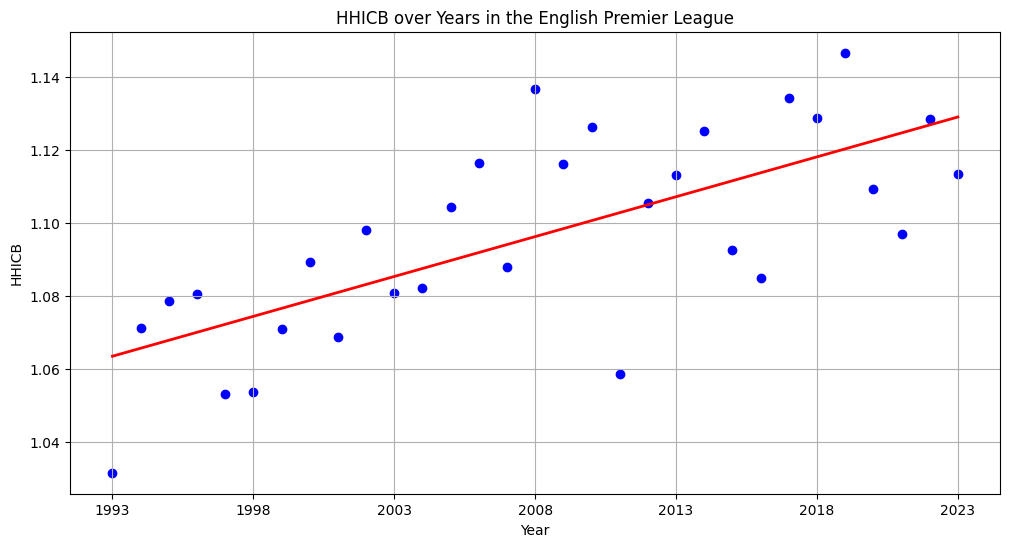

In [12]:

xticks = hhicb_df['Year'][::5]


plt.figure(figsize=(12, 6))
plt.scatter(hhicb_df['Year'], hhicb_df['HHICB'], color='blue')


X = hhicb_df['Year'].values.reshape(-1, 1)  
y = hhicb_df['HHICB'].values
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

plt.plot(hhicb_df['Year'], trendline, color='red', linewidth=2)


plt.title('HHICB over Years in the English Premier League')
plt.xlabel('Year')
plt.ylabel('HHICB')
plt.xticks(ticks=xticks) 
plt.grid(True)
plt.show()

In [59]:
from scipy import stats


hhicb_df['Year'] = pd.to_numeric(hhicb_df['Year'], errors='coerce')
hhicb_df['HHICB'] = pd.to_numeric(hhicb_df['HHICB'], errors='coerce')


hhicb_df.dropna(subset=['Year', 'HHICB'], inplace=True)


slope, intercept, r_value, p_value, std_err = stats.linregress(
    hhicb_df['Year'], 
    hhicb_df['HHICB']
)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: There is a statistically significant trend.")
else:
    print("We cannot reject the null hypothesis: There is no statistically significant trend.")


Slope: 0.002188013089220137
Intercept: -3.297233279998389
P-value: 8.744518838984316e-06
Standard error: 0.0004064442929163895
We reject the null hypothesis: There is a statistically significant trend.


In [14]:
# relative entropy
relative_entropy_values = {}

for year, df in filtered_dataframes.items():
    df_copy = df.copy()
    total_points = df_copy['Pts'].sum()
    
    df_copy['Pts'] = df_copy['Pts'].replace(0, np.finfo(float).eps)

    df_copy['pi'] = df_copy['Pts'] / total_points
    
    df_copy['pi_log_pi'] = df_copy['pi'] * np.log(df_copy['pi'])
    relative_entropy = - df_copy['pi_log_pi'].sum() / np.log(len(df_copy))
    
    relative_entropy_values[year] = relative_entropy

relative_entropy_df = pd.DataFrame(list(relative_entropy_values.items()), columns=['Year', 'RelativeEntropy'])

# Result
print(relative_entropy_df)


    Year  RelativeEntropy
0   2023         0.981293
1   2022         0.978851
2   2021         0.982950
3   2020         0.982185
4   2019         0.975527
5   2018         0.980080
6   2017         0.978317
7   2016         0.984971
8   2015         0.984960
9   2014         0.979714
10  2013         0.981597
11  2012         0.982985
12  2011         0.990628
13  2010         0.978595
14  2009         0.981732
15  2008         0.976081
16  2007         0.985908
17  2006         0.979818
18  2005         0.983813
19  2004         0.987110
20  2003         0.985686
21  2002         0.984224
22  2001         0.988359
23  2000         0.985001
24  1999         0.988610
25  1998         0.991183
26  1997         0.991376
27  1996         0.986681
28  1995         0.987209
29  1994         0.988722
30  1993         0.995099


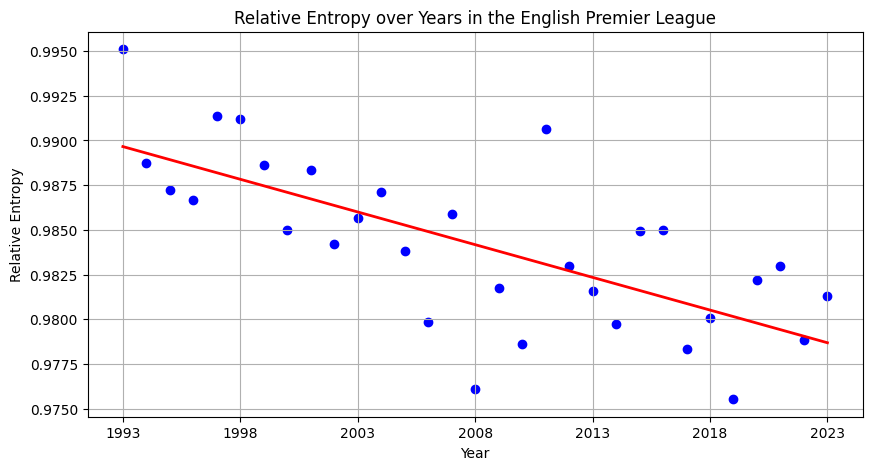

In [15]:

relative_entropy_df['Year'] = pd.to_numeric(relative_entropy_df['Year'])  


relative_entropy_df = relative_entropy_df.sort_values('Year')


xticks = relative_entropy_df['Year'][::5]

plt.figure(figsize=(10, 5))
plt.scatter(relative_entropy_df['Year'], relative_entropy_df['RelativeEntropy'], color='blue')


X = relative_entropy_df['Year'].values.reshape(-1, 1)  
y = relative_entropy_df['RelativeEntropy'].values
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

plt.plot(relative_entropy_df['Year'], trendline, color='red', linewidth=2)


plt.title('Relative Entropy over Years in the English Premier League')
plt.xlabel('Year')
plt.ylabel('Relative Entropy')
plt.xticks(ticks=xticks)  
plt.grid(True)
plt.show()


In [58]:
from scipy import stats

relative_entropy_df['Year'] = pd.to_numeric(relative_entropy_df['Year'], errors='coerce')
relative_entropy_df['RelativeEntropy'] = pd.to_numeric(relative_entropy_df['RelativeEntropy'], errors='coerce')

relative_entropy_df.dropna(subset=['Year', 'RelativeEntropy'], inplace=True)


slope, intercept, r_value, p_value, std_err = stats.linregress(
    relative_entropy_df['Year'], 
    relative_entropy_df['RelativeEntropy']
)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: There is a statistically significant trend.")
else:
    print("We cannot reject the null hypothesis: There is no statistically significant trend.")


Slope: -0.0003656477789961956
Intercept: 1.718390581871967
P-value: 9.859550893431064e-06
Standard error: 6.847253424829639e-05
We reject the null hypothesis: There is a statistically significant trend.


# Import of Data

In [17]:

data_2023 = pd.DataFrame({
     'Club': [
        'Manchester City',  
        'Arsenal',         
        'Chelsea',          
        'Manchester Utd',   
        'Liverpool',       
        'Tottenham',        
        'Newcastle Utd',    
        'Brighton',         
        'Aston Villa',      
        'Wolves',           
        'Leicester City',   
        'West Ham',        
        'Southampton',     
        'Everton',          
        'Nott\'ham Forest', 
        'Brentford',        
        'Leeds United',     
        'Crystal Palace',   
        'Fulham',           
        'Bournemouth'      
    ],
    'Squad': [
        34, 42, 43, 48, 39, 34, 38, 42, 43, 43, 38, 44, 46, 40, 50, 36, 47, 39, 47, 47
    ],
    'Average Age': [
        25.5, 23.5, 24.7, 24.9, 25.1, 25.4, 27.8, 23.6, 24.9, 25.3, 25.9, 24.9, 24.2,
        26.3, 26.1, 24.8, 23.5, 24.9, 25.3, 24.4
    ],
    'Foreigners': [
        21, 25, 28, 28, 24, 21, 21, 28, 24, 34, 22, 24, 25, 20, 29, 26, 31, 19, 34, 23
    ],
    'Market Value (million £)': [
        33.70, 23.83, 23.14, 17.67, 20.82, 19.09, 14.25, 12.61, 11.85, 11.57,
        12.92, 10.59, 9.13, 10.33, 7.53, 10.31, 7.34, 8.28, 6.28, 6.11
    ],
'Total Market Value (million £)': [
        1150.00, 1000.00, 994.95, 848.00, 811.85, 649.10, 541.60, 529.80, 509.55, 497.65, 
        490.80, 465.75, 419.95, 413.15, 376.25, 371.20, 345.15, 323.05, 295.25, 287.20
    ]
})


club_data = {2023: data_2023}


In [18]:
data_2022 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Liverpool', 'Chelsea', 'Manchester Utd', 'Tottenham',
        'Arsenal', 'Leicester City', 'Aston Villa', 'Everton', 'Wolves',
        'West Ham', 'Brighton', 'Newcastle Utd', 'Leeds United',
        'Southampton', 'Brentford', 'Crystal Palace', 'Norwich City', 'Watford',
        'Burnley'
    ],
    'Squad': [
        39, 49, 44, 43, 45, 41, 40, 44, 42, 38, 36, 43, 34, 35, 33, 38, 33, 45, 47, 35
    ],
    'Average Age': [
        24.3, 24.0, 25.1, 25.5, 23.5, 23.4, 25.1, 24.2, 25.5, 24.4, 26.0, 24.1, 27.4, 23.5,
        25.1, 24.3, 25.9, 24.2, 25.8, 27.3
    ],
    'Foreigners': [
        23, 29, 25, 28, 26, 25, 24, 21, 23, 30, 20, 31, 18, 20, 19, 27, 16, 29, 36, 16
    ],
    'Market Value (million £)': [
        25.74, 18.75, 20.78, 17.89, 15.32, 14.95, 13.16, 11.09, 11.41, 9.92, 9.86, 7.40,
        9.23, 8.56, 8.31, 7.19, 8.21, 3.63, 3.32, 3.94
    ],
    'Total Market Value (million £)': [
        1000.00, 918.90, 914.50, 769.15, 689.35, 613.05, 526.55, 487.75, 479.05, 376.95,
        354.90, 318.00, 313.90, 299.45, 274.30, 273.30, 271.05, 163.20, 156.20, 137.85
    ]
})

club_data[2022] = data_2022



In [19]:

data_2021 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Liverpool', 'Chelsea', 'Manchester Utd', 'Tottenham',
        'Arsenal', 'Everton', 'Leicester City', 'Wolves', 'Aston Villa',
        'West Ham', 'Brighton', 'Southampton', 'Newcastle Utd', 
        'Fulham', 'Leeds United', 'Crystal Palace', 'Sheffield Utd', 'West Brom', 
        'Burnley'
    ],
    'Squad': [
        36, 43, 39, 39, 41, 42, 44, 40, 38, 53, 39, 46, 39, 33, 38, 39, 36, 40, 43, 32
    ],
    'Average Age': [
        24.9, 24.4, 25.2, 24.9, 24.6, 24.4, 24.7, 25.3, 23.9, 23.3, 26.5, 24.3, 24.5, 26.9, 
        26.4, 24.5, 27.7, 24.9, 26.1, 26.6
    ],
    'Foreigners': [
        23, 28, 23, 24, 23, 27, 26, 26, 32, 24, 23, 30, 22, 18, 30, 24, 18, 16, 18, 11
    ],
    'Market Value (million £)': [
        29.01, 22.55, 22.80, 19.74, 17.16, 14.74, 11.62, 12.77, 11.85, 8.13, 8.59, 6.31, 
        7.25, 7.74, 6.31, 6.11, 5.38, 3.75, 3.28, 4.13
    ],
    'Total Market Value (million £)': [
        1040.00, 969.65, 889.20, 770.05, 703.50, 619.25, 511.20, 510.60, 450.30, 430.75, 
        334.90, 290.40, 282.80, 255.35, 239.75, 238.10, 193.85, 149.85, 141.15, 132.30
    ]
})


club_data[2021] = data_2021



In [20]:

data_2020 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Liverpool', 'Tottenham', 'Chelsea', 'Manchester Utd',
        'Arsenal', 'Everton', 'Leicester City', 'Wolves', 'West Ham',
        'Bournemouth', 'Newcastle Utd', 'Aston Villa', 'Southampton', 'Brighton',
        'Watford', 'Crystal Palace', 'Burnley', 'Norwich City', 'Sheffield Utd'
    ],
    'Squad': [
        34, 56, 36, 36, 43, 38, 35, 32, 44, 38, 39, 41, 38, 36, 45, 43, 33, 35, 38, 34
    ],
    'Average Age': [
        25.1, 23.3, 24.8, 24.1, 23.9, 24.3, 26.0, 25.9, 23.1, 26.5, 24.8, 26.0, 25.7, 24.4, 24.7, 
        25.7, 26.8, 26.3, 25.5, 27.3
    ],
    'Foreigners': [
        24, 32, 22, 23, 25, 24, 21, 19, 30, 26, 17, 23, 22, 20, 29, 28, 18, 12, 25, 16
    ],
    'Market Value (million £)': [
        30.84, 17.90, 22.41, 19.61, 15.59, 15.99, 12.02, 12.85, 7.28, 7.99, 6.98, 6.16, 6.10, 
        5.85, 4.46, 4.64, 5.74, 4.68, 3.82, 4.08
    ],
    'Total Market Value (million £)': [
        1050.00, 1000.00, 806.80, 705.85, 670.45, 607.65, 420.55, 411.10, 320.33, 303.60, 272.18, 
        252.48, 231.70, 210.75, 200.78, 199.60, 189.33, 163.88, 145.33, 138.60
    ]
})


club_data[2020] = data_2020



In [21]:

data_2019 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Liverpool', 'Chelsea', 'Tottenham', 'Manchester Utd',
        'Arsenal', 'Everton', 'Leicester City', 'West Ham', 'Bournemouth',
        'Southampton', 'Wolves', 'Crystal Palace', 'Fulham',
        'Newcastle Utd', 'Watford', 'Burnley', 'Brighton',
        'Huddersfield', 'Cardiff City'
    ],
    'Squad': [
        46, 39, 54, 34, 36, 42, 40, 37, 37, 37, 40, 40, 36, 33, 37, 39, 33, 41, 33, 35
    ],
    'Average Age': [
        24.3, 24.7, 25.6, 25.4, 25.3, 24.9, 26.0, 26.4, 26.6, 25.7, 24.9, 24.1, 26.4, 25.7,
        26.0, 26.2, 28.1, 25.8, 25.3, 27.3
    ],
    'Foreigners': [
        35, 25, 40, 20, 22, 28, 28, 27, 24, 17, 19, 26, 21, 26, 23, 32, 14, 29, 21, 21
    ],
    'Market Value (million £)': [
        26.16, 30.06, 21.60, 26.43, 22.16, 15.69, 13.23, 11.73, 9.70, 8.38, 7.64, 7.57, 8.03,
        7.70, 6.61, 6.13, 5.98, 4.74, 4.17, 3.23
    ],
    'Total Market Value (million £)': [
        1200.00, 1170.00, 1170.00, 898.60, 797.60, 659.05, 529.10, 434.10, 359.00, 310.00, 
        305.40, 302.90, 289.00, 254.25, 244.65, 239.10, 197.25, 194.35, 137.45, 113.00
    ]
})


club_data[2019] = data_2019



In [22]:

data_2018 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Chelsea', 'Liverpool', 'Manchester Utd', 'Tottenham',
        'Arsenal', 'Everton', 'Leicester City', 'Southampton', 'West Ham',
        'Crystal Palace', 'Newcastle Utd', 'Watford', 'Stoke City', 'Burnley',
        'West Brom', 'Swansea City', 'Brighton', 'Bournemouth',
        'Huddersfield'
    ],
    'Squad': [
        32, 46, 35, 35, 34, 45, 48, 34, 29, 41, 41, 37, 37, 35, 30, 33, 36, 39, 35, 35
    ],
    'Average Age': [
        25.1, 24.7, 24.9, 26.1, 24.7, 24.8, 24.9, 26.5, 25.8, 25.3, 25.8, 25.4, 26.8, 26.2, 27.8, 
        26.5, 26.3, 26.7, 26.0, 25.6
    ],
    'Foreigners': [
        22, 33, 21, 22, 22, 27, 30, 22, 16, 25, 23, 25, 28, 27, 16, 17, 25, 27, 14, 19
    ],
    'Market Value (million £)': [
        31.53, 19.22, 24.50, 24.27, 24.40, 15.42, 7.94, 8.95, 10.24, 6.36, 5.38, 5.63, 5.30, 5.50, 
        5.64, 5.03, 4.60, 3.80, 4.13, 3.03
    ],
    'Total Market Value (million £)': [
        1010.00, 884.25, 857.50, 849.50, 829.60, 694.00, 381.25, 304.25, 297.00, 260.60, 220.73, 
        208.28, 196.00, 192.45, 169.30, 165.95, 165.49, 148.20, 144.50, 106.05
    ]
})


club_data[2018] = data_2018


In [23]:

data_2017 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester City', 'Tottenham', 'Arsenal', 'Manchester Utd',
        'Liverpool', 'Everton', 'West Ham', 'Southampton', 'Crystal Palace',
        'Leicester City', 'Stoke City', 'Watford', 'Swansea City', 'Hull City',
        'Sunderland', 'Bournemouth', 'Middlesbrough', 'West Brom', 'Burnley'
    ],
    'Squad': [
        49, 35, 38, 42, 42, 38, 39, 44, 36, 45, 31, 34, 46, 37, 42, 42, 41, 35, 30, 36
    ],
    'Average Age': [
        24.8, 26.4, 23.7, 24.7, 24.4, 24.4, 25.9, 24.7, 25.3, 26.1, 26.6, 27.1, 26.8, 26.9, 26.0,
        25.3, 24.4, 27.3, 27.3, 26.6
    ],
    'Foreigners': [
        41, 29, 20, 26, 25, 24, 25, 29, 19, 26, 22, 27, 37, 28, 24, 27, 16, 21, 18, 15
    ],
    'Market Value (million £)': [
        14.01, 16.47, 14.31, 12.90, 12.65, 11.20, 7.98, 6.21, 7.33, 5.08, 7.05, 5.47, 3.82, 4.25, 
        3.23, 3.14, 3.21, 3.68, 4.11, 2.98
    ],
    'Total Market Value (million £)': [
        686.70, 576.50, 543.65, 542.00, 531.45, 425.65, 311.25, 273.05, 263.75, 228.43, 218.65, 
        186.00, 175.65, 157.10, 135.85, 132.00, 131.60, 128.80, 123.20, 107.18
    ]
})


club_data[2017] = data_2017


In [24]:

data_2016 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester City', 'Arsenal', 'Manchester Utd', 'Liverpool',
        'Tottenham', 'Everton', 'Southampton', 'West Ham', 'Newcastle Utd',
        'Leicester City', 'Stoke City', 'Swansea City', 'Watford', 'Crystal Palace',
        'Aston Villa', 'Norwich City', 'West Brom', 'Sunderland', 'Bournemouth'
    ],
    'Squad': [
        40, 38, 41, 44, 44, 31, 39, 35, 50, 42, 35, 31, 36, 39, 38, 44, 41, 35, 42, 49
    ],
    'Average Age': [
        24.7, 25.4, 24.7, 23.5, 23.4, 23.7, 25.7, 25.0, 24.2, 24.6, 26.9, 27.3, 25.8, 27.4, 
        26.6, 24.5, 26.6, 26.4, 26.5, 25.1
    ],
    'Foreigners': [
        31, 27, 29, 26, 27, 16, 21, 20, 28, 27, 21, 24, 27, 35, 20, 24, 23, 22, 27, 22
    ],
    'Market Value (million £)': [
        13.84, 13.14, 11.17, 10.00, 8.53, 12.00, 6.41, 6.44, 4.03, 4.71, 4.60, 4.74, 4.05, 
        3.51, 3.57, 2.68, 2.85, 3.23, 2.65, 2.04
    ],
    'Total Market Value (million £)': [
        553.50, 499.35, 457.85, 439.85, 375.25, 371.85, 249.85, 225.50, 201.33, 198.00, 
        161.10, 147.00, 145.80, 137.00, 135.70, 117.95, 116.90, 113.10, 111.25, 99.90
    ]
})


club_data[2016] = data_2016


In [25]:

data_2015 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester Utd', 'Manchester City', 'Arsenal', 'Liverpool',
        'Tottenham', 'Southampton', 'Everton', 'Newcastle Utd', 'West Ham',
        'Swansea City', 'Hull City', 'Aston Villa', 'QPR', 'Stoke City',
        'Crystal Palace', 'West Brom', 'Sunderland', 'Leicester City', 'Burnley'
    ],
    'Squad': [
        38, 43, 34, 42, 35, 42, 37, 40, 42, 36, 36 ,35, 38, 41, 30, 42, 34, 34, 37, 30
    ],
    'Average Age': [
        24.9, 24.9, 26.7, 24.0, 24.3, 24.7, 24.5, 25.3, 23.9, 25.8, 25.3, 27.0, 25.3, 26.0, 27.4,
        27.0, 26.5, 25.8, 26.9, 26.5
    ],
    'Foreigners': [
        28, 26, 27, 29, 21, 25, 20, 22, 27, 21, 26, 25, 20, 25, 23, 26, 23, 20, 19, 13
    ],
    'Market Value (million £)': [
        14.66, 11.75, 13.18, 9.88, 9.28, 7.24, 5.68, 4.57, 3.33, 3.78, 3.63, 3.35, 3.01, 2.74, 3.68,
        2.32, 2.82, 2.68, 1.80, 1.75
    ],
    'Total Market Value (million £)': [
        557.25, 505.40, 448.25, 414.75, 324.85, 304.15, 210.25, 182.85, 140.00, 135.90, 130.75, 
        117.10, 114.25, 112.25, 110.50, 97.25, 95.95, 91.00, 66.70, 52.55
    ]
})


club_data[2015] = data_2015


In [26]:

data_2014 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester City', 'Manchester Utd', 'Arsenal', 'Liverpool',
        'Tottenham', 'Everton', 'Newcastle Utd', 'Southampton', 'Swansea City',
        'Sunderland', 'Fulham', 'West Ham', 'Aston Villa', 'Stoke City',
        'West Brom', 'Norwich City', 'Cardiff City', 'Crystal Palace', 'Hull City'
    ],
    'Squad': [
        49, 27, 37, 41, 36, 41, 34, 37, 35, 36, 39, 48, 45, 36, 33, 33, 32, 42, 45, 34
    ],
    'Average Age': [
        24.7, 26.8, 25.5, 24.5, 24.1, 23.8, 26.0, 24.8, 24.2, 25.7, 25.6, 25.9, 25.8, 24.7, 26.5,
        27.2, 26.6, 25.3, 26.6, 27.2
    ],
    'Foreigners': [
        40, 21, 24, 34, 25, 22, 23, 27, 17, 28, 28, 36, 26, 22, 23, 24, 18, 26, 25, 24
    ],
    'Market Value (million £)': [
        11.92, 16.88, 10.88, 9.41, 8.77, 7.05, 6.18, 4.66, 3.76, 3.58, 3.13, 2.35, 2.43, 3.04, 3.17,
        2.75, 2.79, 2.09, 1.53, 2.00
    ],
    'Total Market Value (million £)': [
        584.20, 455.80, 402.55, 385.75, 315.75, 288.95, 210.00, 172.30, 131.50, 128.93, 122.00,
        112.65, 109.50, 109.50, 104.70, 90.80, 89.30, 87.90, 68.70, 68.15
    ]
})


club_data[2014] = data_2014


In [27]:

data_2013 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Manchester Utd', 'Chelsea', 'Arsenal', 'Tottenham',
        'Liverpool', 'Newcastle Utd', 'Everton', 'Sunderland', 'QPR',
        'Aston Villa', 'Fulham', 'Stoke City', 'West Ham', 'Swansea City',
        'West Brom', 'Wigan Athletic', 'Southampton', 'Norwich City', 'Reading'
    ],
    'Squad': [
        41, 41, 34, 42, 41, 41, 39, 29, 37, 38, 33, 37, 30, 39, 33, 32, 37, 40, 36, 35
    ],
    'Average Age': [
        24.8, 24.7, 25.9, 24.0, 25.5, 23.5, 24.6, 25.7, 25.3, 28.7, 24.7, 27.4, 28.3, 25.5, 26.2,
        26.0, 25.8, 24.8, 25.9, 26.3
    ],
    'Foreigners': [
        29, 24, 25, 35, 21, 21, 26, 20, 19, 22, 21, 32, 18, 20, 22, 23, 29, 16, 16, 25
    ],
    'Market Value (million £)': [
        12.25, 11.16, 13.36, 7.07, 7.24, 6.73, 5.13, 4.82, 3.62, 3.16, 3.35, 2.97, 3.47, 2.64, 
        3.10, 2.92, 2.47, 2.08, 2.03, 1.32
    ],
    'Total Market Value (million £)': [
        502.10, 457.50, 454.25, 296.90, 296.80, 276.10, 200.25, 139.75, 133.90, 120.05, 110.50,
        109.85, 104.05, 103.00, 102.25, 93.50, 91.55, 83.05, 73.25, 46.25
    ]
})


club_data[2013] = data_2013



In [28]:

data_2012 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Manchester Utd', 'Chelsea', 'Arsenal', 'Tottenham',
        'Liverpool', 'Everton', 'Newcastle Utd', 'Sunderland', 'Aston Villa',
        'Fulham', 'Bolton', 'Stoke City', 'QPR', 'Blackburn',
        'Wolves', 'Swansea City', 'Wigan Athletic', 'West Brom', 'Norwich City'
    ],
    'Squad': [
        36, 41, 32, 45, 50, 31, 36, 37, 36, 37, 36, 38, 32, 48, 37, 37, 34, 30, 36, 29
    ],
    'Average Age': [
        25.4, 24.6, 26.7, 24.2, 25.2, 25.6, 26.3, 24.8, 25.5, 25.6, 27.1, 25.9, 28.5, 27.6, 25.4, 
        25.0, 25.5, 26.2, 26.0, 25.5
    ],
    'Foreigners': [
        24, 24, 21, 35, 27, 18, 25, 21, 20, 23, 28, 19, 16, 25, 26, 24, 21, 22, 24, 12
    ],
    'Market Value (million £)': [
        13.85, 9.86, 11.73, 8.05, 6.47, 7.64, 4.72, 4.37, 3.51, 3.34, 2.78, 2.37, 2.55, 1.70, 2.16, 
        2.11, 2.22, 2.48, 1.93, 2.03
    ],
    'Total Market Value (million £)': [
        498.60, 404.10, 375.50, 362.43, 323.50, 236.90, 169.95, 161.70, 126.50, 123.50, 100.00, 
        90.05, 81.65, 81.38, 80.00, 78.05, 75.60, 74.25, 69.55, 58.75
    ]
})


club_data[2012] = data_2012


In [29]:

data_2011 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester City', 'Manchester Utd', 'Liverpool', 'Arsenal',
        'Tottenham', 'Aston Villa', 'Everton', 'Sunderland', 'West Ham',
        'Newcastle Utd', 'Fulham', 'Bolton', 'Birmingham City', 'Stoke City',
        'Blackburn', 'West Brom', 'Wolves', 'Wigan Athletic', 
        'Blackpool'
    ],
    'Squad': [
        33, 45, 43, 42, 34, 38, 39, 32, 39, 40, 38, 34, 34, 34, 33, 37, 37, 42, 35, 45
    ],
    'Average Age': [
        25.5, 24.4, 25.1, 24.5, 24.4, 25.7, 26.1, 24.9, 24.7, 25.9, 24.7, 28.5, 26.4, 26.8, 27.9,
        26.1, 25.2, 24.7, 25.0, 25.2
    ],
    'Foreigners': [
        23, 28, 29, 25, 27, 22, 21, 21, 20, 24, 17, 27, 18, 20, 20, 29, 24, 25, 24, 23
    ],
    'Market Value (million £)': [
        12.85, 8.98, 9.02, 8.08, 9.53, 8.09, 5.20, 5.76, 3.83, 3.47, 3.14, 3.22, 2.95, 2.81, 2.86,
        2.47, 2.35, 1.99, 2.30, 1.11
    ],
    'Total Market Value (million £)': [
        424.10, 404.18, 388.00, 339.20, 324.00, 307.38, 202.80, 184.48, 149.33, 138.75, 119.48,
        109.55, 100.15, 95.38, 94.45, 91.53, 86.88, 83.55, 80.50, 50.03
    ]
})


club_data[2011] = data_2011

In [30]:

data_2010 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester Utd', 'Liverpool', 'Arsenal', 'Manchester City',
        'Tottenham', 'Everton', 'Aston Villa', 'Sunderland', 'West Ham',
        'Fulham', 'Portsmouth', 'Blackburn', 'Bolton', 'Stoke City',
        'Wigan Athletic', 'Hull City', 'Birmingham City', 'Wolves', 'Burnley'
    ],
    'Squad': [
        36, 40, 34, 45, 40, 41, 42, 31, 38, 35, 41, 45, 35, 32, 39, 36, 37, 36, 37, 33
    ],
    'Average Age': [
        25.9, 25.0, 24.6, 22.7, 25.1, 24.3, 24.1, 26.5, 25.5, 24.8, 26.5, 26.4, 26.3, 26.3, 26.4,
        26.2, 27.0, 26.5, 25.1, 26.0
    ],
    'Foreigners': [
        27, 25, 25, 31, 25, 20, 23, 14, 26, 24, 26, 29, 29, 18, 19, 27, 23, 19, 21, 20
    ],
    'Market Value (million £)': [
        12.55, 9.62, 9.75, 6.98, 7.81, 6.43, 5.21, 5.40, 3.46, 3.48, 2.47, 2.15, 2.62, 2.68, 2.07,
        2.16, 1.98, 1.93, 1.77, 1.46
    ],
    'Total Market Value (million £)': [
        451.95, 384.88, 331.55, 314.30, 312.50, 263.53, 218.93, 167.38, 131.58, 121.75, 101.18, 
        96.65, 91.63, 85.80, 80.70, 77.60, 73.20, 69.65, 65.48, 48.15
    ]
})


club_data[2010] = data_2010


In [31]:

data_2009 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester Utd', 'Liverpool', 'Arsenal', 'Tottenham',
        'Manchester City', 'Everton', 'Aston Villa', 'Portsmouth', 'Newcastle Utd',
        'West Ham', 'Sunderland', 'Wigan Athletic', 'Blackburn', 'Middlesbrough',
        'Fulham', 'Bolton', 'West Brom', 'Hull City', 'Stoke City'
    ],
    'Squad': [
        33, 42, 33, 41, 43, 38, 32, 35, 36, 38, 40, 44, 35, 36, 33, 38, 33, 35, 35, 38
    ],
    'Average Age': [
        26.5, 23.9, 24.8, 22.2, 23.7, 24.6, 24.8, 24.7, 27.6, 24.8, 25.2, 25.5, 26.5, 26.1, 23.2, 
        26.2, 25.9, 24.9, 27.9, 26.8
    ],
    'Foreigners': [
        24, 26, 27, 31, 24, 26, 16, 16, 22, 22, 20, 29, 22, 27, 14, 24, 20, 25, 17, 19
    ],
    'Market Value (million £)': [
        13.59, 10.14, 10.39, 7.60, 6.49, 6.65, 5.95, 4.50, 4.24, 3.54, 3.35, 2.51, 2.96, 2.53, 2.59,
        2.21, 2.47, 1.89, 1.85, 1.67
    ],
    'Total Market Value (million £)': [
        448.60, 425.95, 342.85, 311.45, 279.10, 252.85, 190.33, 157.35, 152.60, 134.55, 133.90,
        110.30, 103.75, 91.20, 85.45, 83.85, 81.65, 66.10, 64.70, 63.45
    ]
})

club_data[2009] = data_2009


In [32]:

data_2008 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester Utd', 'Liverpool', 'Arsenal', 'Tottenham',
        'Everton', 'Manchester City', 'Portsmouth', 'Newcastle Utd', 'Middlesbrough',
        'West Ham', 'Aston Villa', 'Bolton', 'Fulham', 'Blackburn',
        'Sunderland', 'Birmingham City', 'Wigan Athletic', 'Reading', 'Derby County'
    ],
    'Squad': [
        39, 38, 41, 35, 38, 32, 35, 34, 33, 34, 36, 25, 42, 43, 38, 45, 33, 35, 43, 41
    ],
    'Average Age': [
        25.2, 24.7, 23.4, 22.8, 24.3, 25.3, 24.4, 26.3, 25.6, 24.5, 26.1, 25.2, 25.8, 27.7, 25.5,
        25.0, 24.7, 26.8, 24.9, 26.7
    ],
    'Foreigners': [
        25, 21, 26, 30, 21, 18, 23, 23, 21, 15, 16, 11, 30, 33, 31, 33, 23, 23, 30, 23
    ],
    'Market Value (million £)': [
        11.14, 9.33, 7.45, 7.50, 5.80, 4.85, 4.29, 4.16, 4.10, 3.56, 3.33, 4.48, 2.48, 2.30, 2.39,
        1.86, 2.52, 2.22, 1.53, 1.23
    ],
    'Total Market Value (million £)': [
        434.35, 354.55, 305.65, 262.40, 220.50, 155.30, 150.10, 141.30, 135.20, 120.90, 120.00,
        112.10, 104.20, 99.05, 90.85, 83.75, 83.25, 77.75, 65.93, 50.40
    ]
})

club_data[2008] = data_2008



In [33]:
data_2007 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Arsenal', 'Manchester Utd', 'Liverpool', 'Tottenham',
        'Newcastle Utd', 'Aston Villa', 'Everton', 'West Ham', 'Portsmouth',
        'Middlesbrough', 'Manchester City', 'Fulham', 'Blackburn', 'Wigan Athletic',
        'Bolton', 'Charlton Ath', 'Sheffield Utd', 'Watford', 'Reading'
    ],
    'Squad': [
        37, 38, 38, 38, 38, 35, 34, 30, 35, 31, 35, 32, 37, 31, 37, 34, 37, 43, 43, 38
    ],
    'Average Age': [
        24.2, 23.3, 24.5, 24.1, 24.1, 25.2, 26.0, 26.4, 25.9, 27.4, 24.4, 25.6, 27.3, 27.4, 27.1,
        25.6, 25.7, 26.4, 23.8, 24.4
    ],
    'Foreigners': [
        25, 32, 19, 25, 20, 23, 19, 19, 14, 20, 16, 16, 29, 24, 25, 26, 25, 20, 21, 26
    ],
    'Market Value (million £)': [
        11.27, 7.32, 6.82, 6.31, 4.36, 4.19, 3.22, 3.65, 3.01, 3.13, 2.75, 2.78, 2.29, 2.55, 2.03,
        2.13, 1.93, 1.01, 0.767, 0.865
    ],
    'Total Market Value (million £)': [
        416.81, 278.18, 259.15, 239.77, 165.73, 146.55, 109.50, 109.45, 105.45, 97.08, 96.32, 
        89.00, 84.68, 78.90, 74.93, 72.38, 71.47, 43.36, 32.97, 32.88
    ]
})

club_data[2007] = data_2007



In [34]:

data_2006 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester Utd', 'Arsenal', 'Liverpool', 'Tottenham',
        'Newcastle Utd', 'Middlesbrough', 'Everton', 'Manchester City', 'Aston Villa',
        'Portsmouth', 'Charlton Ath', 'Birmingham City', 'Fulham', 'West Brom',
        'Blackburn', 'West Ham', 'Bolton', 'Wigan Athletic', 'Sunderland'
    ],
    'Squad': [
        30, 34, 37, 37, 32, 32, 39, 31, 32, 30, 36, 36, 33, 33, 32, 27, 33, 32, 30, 31
    ],
    'Average Age': [
        24.8, 24.8, 23.7, 24.4, 25.8, 26.0, 25.2, 26.8, 25.8, 25.2, 27.0, 26.0, 26.5, 27.2, 26.1,
        27.7, 25.2, 26.3, 27.8, 24.6
    ],
    'Foreigners': [
        21, 21, 30, 27, 16, 13, 18, 19, 17, 17, 29, 21, 18, 24, 15, 21, 14, 23, 18, 20
    ],
    'Market Value (million £)': [
        12.11, 7.49, 6.28, 5.85, 4.82, 4.70, 2.42, 3.00, 2.87, 2.97, 2.39, 2.29, 2.48, 2.15, 2.05,
        2.36, 1.90, 1.93, 1.73, 1.11
    ],
    'Total Market Value (million £)': [
        363.43, 254.58, 232.33, 216.35, 154.33, 150.48, 94.38, 92.92, 91.90, 89.00, 86.13, 82.43,
        81.83, 70.88, 65.55, 63.80, 62.55, 61.85, 51.92, 34.35
    ]
})

club_data[2006] = data_2006


In [35]:

data_2005 = pd.DataFrame({
    'Club': [
        'Chelsea', 'Manchester Utd', 'Arsenal', 'Liverpool', 'Tottenham',
        'Newcastle Utd', 'Birmingham City', 'Manchester City', 'Middlesbrough', 'Southampton',
        'Aston Villa', 'Everton', 'Blackburn', 'Fulham', 'Bolton',
        'Portsmouth', 'Charlton Ath', 'West Brom', 'Crystal Palace', 'Norwich City'
    ],
    'Squad': [
        31, 37, 37, 38, 37, 32, 37, 34, 32, 41, 26, 27, 35, 34, 29, 36, 26, 32, 35, 27
    ],
    'Average Age': [
        24.4, 24.2, 23.4, 24.8, 24.6, 25.4, 26.1, 26.1, 25.7, 25.9, 24.7, 26.8, 27.1, 25.9, 28.0,
        26.0, 26.5, 27.1, 24.8, 27.0
    ],
    'Foreigners': [
        24, 25, 29, 26, 21, 15, 21, 21, 13, 25, 16, 16, 26, 23, 20, 23, 15, 19, 17, 12
    ],
    'Market Value (million £)': [
        10.69, 7.93, 6.68, 5.85, 3.44, 3.93, 2.86, 2.77, 2.78, 2.08, 3.24, 2.75, 2.11, 1.92, 2.19,
        1.75, 2.22, 1.58, 1.10, 1.15
    ],
    'Total Market Value (million £)': [
        331.48, 293.23, 247.00, 222.13, 127.25, 125.90, 105.98, 94.30, 88.93, 85.48, 84.18, 74.28,
        73.88, 65.23, 63.58, 63.00, 57.80, 50.40, 38.53, 30.95
    ]
})

club_data[2005] = data_2005


# Data adjustment

In [36]:
summary = []

for year, df in club_data.items():
    total_market_value = df.iloc[:, -1].sum()  
    summary.append([year, total_market_value])


summary_df = pd.DataFrame(summary, columns=['Year', 'Total Market Value Sum'])



In [37]:
summary_df

,Year,Total Market Value Sum
0,2023,11320.25
1,2022,9337.40
2,2021,9152.95
3,2020,8300.96
4,2019,9804.80
5,2018,8084.90
6,2017,5878.46
7,2016,4858.03
8,2015,4211.95
9,2014,4038.93


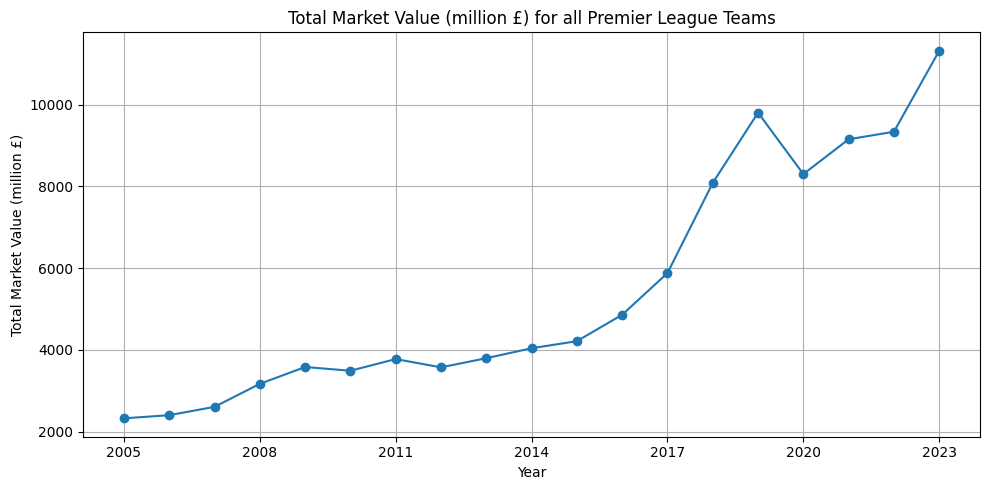

In [38]:
# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(summary_df['Year'], summary_df['Total Market Value Sum'], marker='o')

plt.xticks(ticks=np.arange(2005, 2024, 3))

plt.title("Total Market Value (million £) for all Premier League Teams")
plt.xlabel("Year")
plt.ylabel("Total Market Value (million £)")
plt.grid(True)
plt.tight_layout() 
plt.show()

In [39]:


new_dataset = {}

for year, df in club_data.items():
    new_dataset[year] = df[['Club', df.columns[-1]]]



# HHI Calculation

In [40]:
hhi_index_per_year = {}

for year, df in new_dataset.items():
    df_copy = df.copy()

    df_copy[df_copy.columns[-1]] = df_copy[df_copy.columns[-1]].astype(float)

    total_market_value = df_copy[df_copy.columns[-1]].sum()
    
    df_copy['Market Share'] = ((df_copy[df_copy.columns[-1]] / total_market_value) * 10000) ** 2
    hhi_index_per_year[year] = df_copy['Market Share'].sum() / 10000



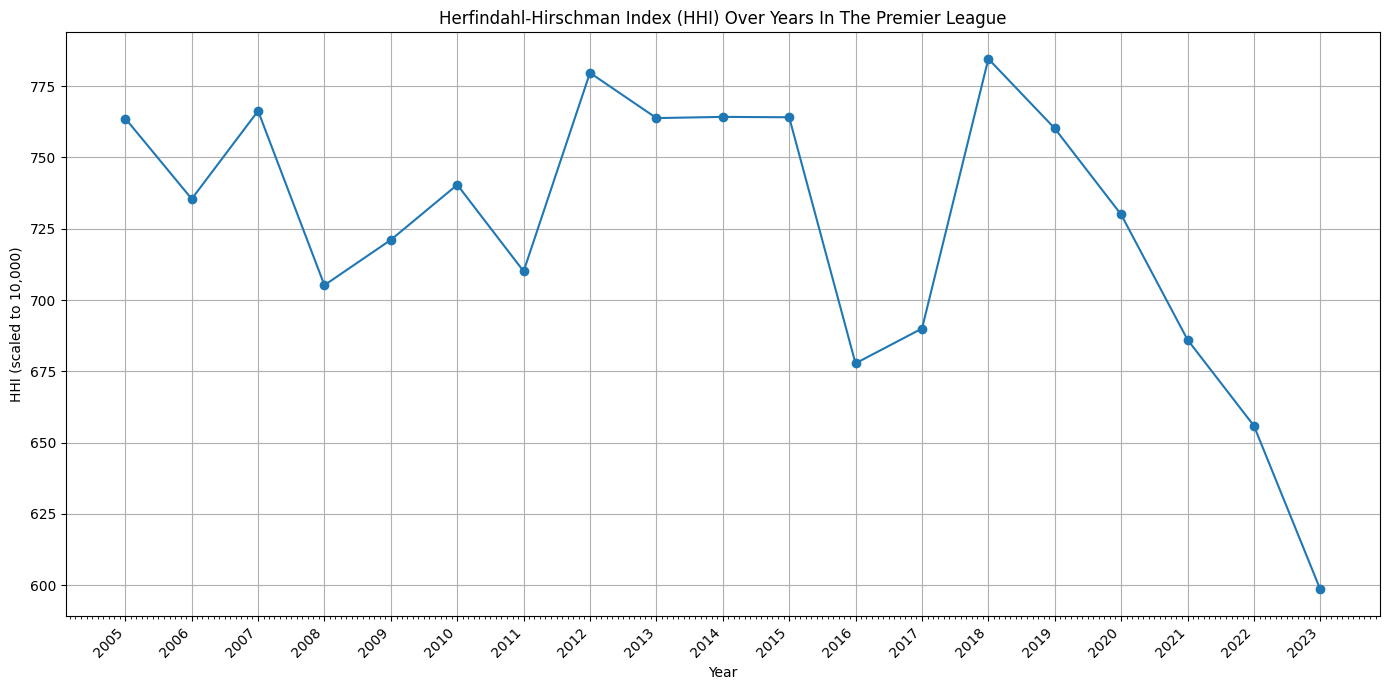

In [41]:


dates = [datetime(year, 1, 1) for year in hhi_index_per_year.keys()]

plt.figure(figsize=(14, 7))
plt.plot(dates, list(hhi_index_per_year.values()), marker='o')
plt.title('Herfindahl-Hirschman Index (HHI) Over Years In The Premier League')
plt.xlabel('Year')
plt.ylabel('HHI (scaled to 10,000)')
plt.grid(True)

years = mdates.YearLocator()  # every year
years_fmt = mdates.DateFormatter('%Y')

# Apply formatting to x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(mdates.MonthLocator())  
ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


# Market share

In [42]:
market_share_percentage_per_year = {}

for year, df in new_dataset.items():
    df_copy = df.copy()

    df_copy[df_copy.columns[-1]] = df_copy[df_copy.columns[-1]].astype(float)
    
    total_market_value = df_copy[df_copy.columns[-1]].sum()
    
    df_copy['Market Share (%)'] = (df_copy[df_copy.columns[-1]] / total_market_value) * 100
    
    df_copy['Market Share (%)'] = df_copy['Market Share (%)'].apply(lambda x: '{:.2f}%'.format(x))
    
    market_share_percentage_per_year[year] = df_copy[['Club', 'Market Share (%)']]



In [43]:
import os
print(f"Current working directory: {os.getcwd()}")

Current working directory: C:\Users\andre\PycharmProjects\pythonProject


In [44]:

for season, market_share_procent1 in market_share_percentage_per_year.items():
    market_share_procent1['Market Share (%)'] = market_share_procent1['Market Share (%)'].str.replace('%', '').astype(float)
    market_share_percentage_per_year[season] = market_share_procent1


C:\Users\andre\AppData\Local\Temp\ipykernel_21036\1838219884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_share_procent1['Market Share (%)'] = market_share_procent1['Market Share (%)'].str.replace('%', '').astype(float)


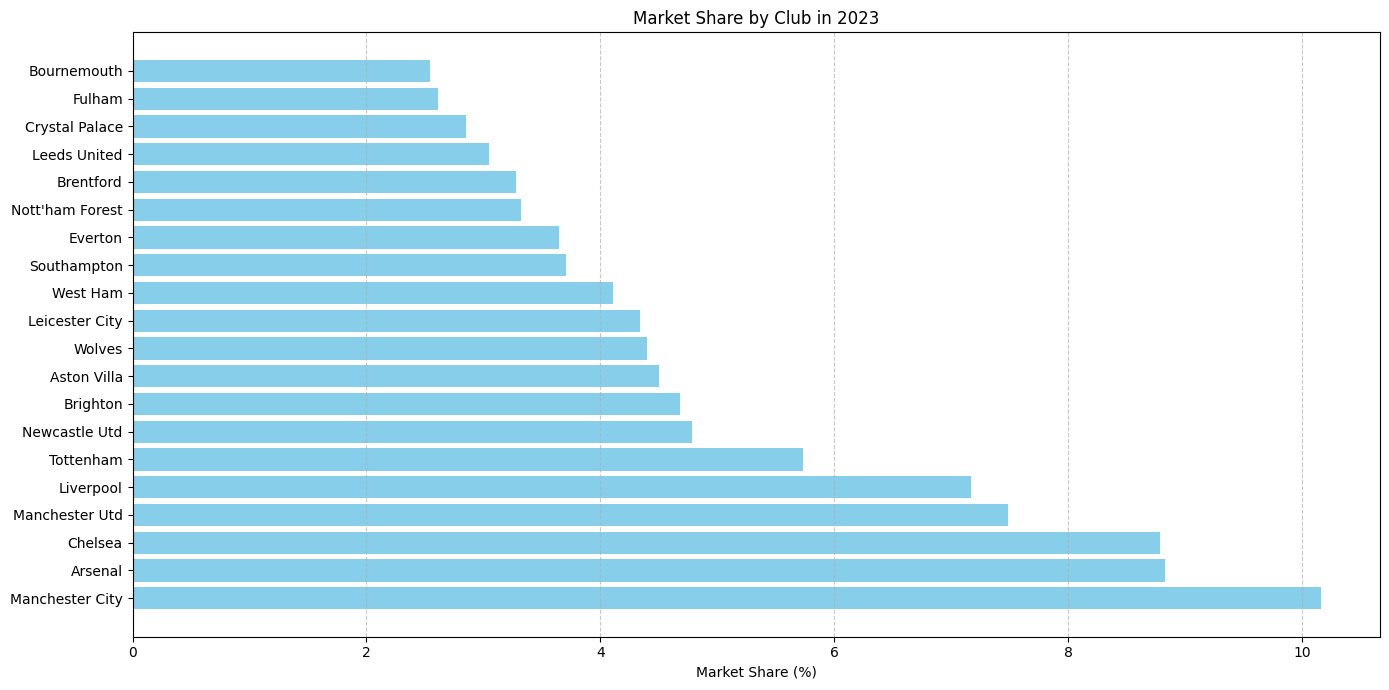

In [47]:
season = 2023
market_share_procent1 = market_share_percentage_per_year[season]

market_share_procent1 = market_share_procent1.sort_values(by='Market Share (%)', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))
plt.barh(market_share_procent1["Club"], market_share_procent1["Market Share (%)"], color='skyblue')
plt.xlabel('Market Share (%)')
plt.title(f'Market Share by Club in {season}')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Data manipulation - Names

In [48]:
market_share_df_2023 = market_share_percentage_per_year[2023].copy()
points_df_2023 = filtered_dataframes["2023"].copy()
market_share_df_2022 = market_share_percentage_per_year[2022].copy()
points_df_2022 = filtered_dataframes["2022"].copy()
market_share_df_2021 = market_share_percentage_per_year[2021].copy()
points_df_2021 = filtered_dataframes["2021"].copy()
market_share_df_2020 = market_share_percentage_per_year[2020].copy()
points_df_2020 = filtered_dataframes["2020"].copy()
market_share_df_2019 = market_share_percentage_per_year[2019].copy()
points_df_2019 = filtered_dataframes["2019"].copy()
market_share_df_2018 = market_share_percentage_per_year[2018].copy()
points_df_2018 = filtered_dataframes["2018"].copy()
market_share_df_2017 = market_share_percentage_per_year[2017].copy()
points_df_2017 = filtered_dataframes["2017"].copy()
market_share_df_2016 = market_share_percentage_per_year[2016].copy()
points_df_2016 = filtered_dataframes["2016"].copy()
market_share_df_2015 = market_share_percentage_per_year[2015].copy()
points_df_2015 = filtered_dataframes["2015"].copy()
market_share_df_2014 = market_share_percentage_per_year[2014].copy()
points_df_2014 = filtered_dataframes["2014"].copy()
market_share_df_2013 = market_share_percentage_per_year[2013].copy()
points_df_2013 = filtered_dataframes["2013"].copy()
market_share_df_2012 = market_share_percentage_per_year[2012].copy()
points_df_2012 = filtered_dataframes["2012"].copy()
market_share_df_2011 = market_share_percentage_per_year[2011].copy()
points_df_2011 = filtered_dataframes["2011"].copy()
market_share_df_2010 = market_share_percentage_per_year[2010].copy()
points_df_2010 = filtered_dataframes["2010"].copy()
market_share_df_2009 = market_share_percentage_per_year[2009].copy()
points_df_2009 = filtered_dataframes["2009"].copy()
market_share_df_2008 = market_share_percentage_per_year[2008].copy()
points_df_2008 = filtered_dataframes["2008"].copy()
market_share_df_2007 = market_share_percentage_per_year[2007].copy()
points_df_2007 = filtered_dataframes["2007"].copy()
market_share_df_2006 = market_share_percentage_per_year[2006].copy()
points_df_2006 = filtered_dataframes["2006"].copy()
market_share_df_2005 = market_share_percentage_per_year[2005].copy()
points_df_2005 = filtered_dataframes["2005"].copy()




points_df_2023.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2022.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2021.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2020.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2019.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2018.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2017.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2016.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2015.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2014.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2013.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2012.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2011.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2010.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2009.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2008.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2007.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2006.rename(columns={'Squad': 'Club'}, inplace=True)
points_df_2005.rename(columns={'Squad': 'Club'}, inplace=True)


In [49]:

points_market = {}
# merge
sammensat_2023 = pd.merge(points_df_2023, market_share_df_2023, on='Club', how='left')
sammensat_2022 = pd.merge(points_df_2022, market_share_df_2022, on='Club', how='left')
sammensat_2021 = pd.merge(points_df_2021, market_share_df_2021, on='Club', how='left')
sammensat_2020 = pd.merge(points_df_2020, market_share_df_2020, on='Club', how='left')
sammensat_2019 = pd.merge(points_df_2019, market_share_df_2019, on='Club', how='left')
sammensat_2018 = pd.merge(points_df_2018, market_share_df_2018, on='Club', how='left')
sammensat_2017 = pd.merge(points_df_2017, market_share_df_2017, on='Club', how='left')
sammensat_2016 = pd.merge(points_df_2016, market_share_df_2016, on='Club', how='left')
sammensat_2015 = pd.merge(points_df_2015, market_share_df_2015, on='Club', how='left')
sammensat_2014 = pd.merge(points_df_2014, market_share_df_2014, on='Club', how='left')
sammensat_2013 = pd.merge(points_df_2013, market_share_df_2013, on='Club', how='left')
sammensat_2012 = pd.merge(points_df_2012, market_share_df_2012, on='Club', how='left')
sammensat_2011 = pd.merge(points_df_2011, market_share_df_2011, on='Club', how='left')
sammensat_2010 = pd.merge(points_df_2010, market_share_df_2010, on='Club', how='left')
sammensat_2009 = pd.merge(points_df_2009, market_share_df_2009, on='Club', how='left')
sammensat_2008 = pd.merge(points_df_2008, market_share_df_2008, on='Club', how='left')
sammensat_2007 = pd.merge(points_df_2007, market_share_df_2007, on='Club', how='left')
sammensat_2006 = pd.merge(points_df_2006, market_share_df_2006, on='Club', how='left')
sammensat_2005 = pd.merge(points_df_2005, market_share_df_2005, on='Club', how='left')

points_market['2023'] = sammensat_2023
points_market['2022'] = sammensat_2022
points_market['2021'] = sammensat_2021
points_market['2020'] = sammensat_2020
points_market['2019'] = sammensat_2019
points_market['2018'] = sammensat_2018
points_market['2017'] = sammensat_2017
points_market['2016'] = sammensat_2016
points_market['2015'] = sammensat_2015
points_market['2014'] = sammensat_2014
points_market['2013'] = sammensat_2013
points_market['2012'] = sammensat_2012
points_market['2011'] = sammensat_2011
points_market['2010'] = sammensat_2010
points_market['2009'] = sammensat_2009
points_market['2008'] = sammensat_2008
points_market['2007'] = sammensat_2007
points_market['2006'] = sammensat_2006
points_market['2005'] = sammensat_2005

points_market

{'2023':                Club  Pts  Market Share (%)
 0   Manchester City   89             10.16
 1           Arsenal   84              8.83
 2    Manchester Utd   75              7.49
 3     Newcastle Utd   71              4.78
 4         Liverpool   67              7.17
 5          Brighton   62              4.68
 6       Aston Villa   61              4.50
 7         Tottenham   60              5.73
 8         Brentford   59              3.28
 9            Fulham   52              2.61
 10   Crystal Palace   45              2.85
 11          Chelsea   44              8.79
 12           Wolves   41              4.40
 13         West Ham   40              4.11
 14      Bournemouth   39              2.54
 15  Nott'ham Forest   38              3.32
 16          Everton   36              3.65
 17   Leicester City   34              4.34
 18     Leeds United   31              3.05
 19      Southampton   25              3.71,
 '2022':                Club  Pts  Market Share (%)
 0   Manchester

# Check for sum

In [50]:
def print_sum_of_market_share(points_market):
    for year, df in points_market.items():
        sum_market_share = df['Market Share (%)'].sum()
        print(f"Year: {year}, Sum of Pts Market Share (%): {sum_market_share:.2f}%")


In [51]:
print_sum_of_market_share(points_market)

Year: 2023, Sum of Pts Market Share (%): 99.99%
Year: 2022, Sum of Pts Market Share (%): 100.01%
Year: 2021, Sum of Pts Market Share (%): 100.01%
Year: 2020, Sum of Pts Market Share (%): 100.00%
Year: 2019, Sum of Pts Market Share (%): 99.98%
Year: 2018, Sum of Pts Market Share (%): 99.99%
Year: 2017, Sum of Pts Market Share (%): 100.00%
Year: 2016, Sum of Pts Market Share (%): 99.99%
Year: 2015, Sum of Pts Market Share (%): 99.99%
Year: 2014, Sum of Pts Market Share (%): 100.01%
Year: 2013, Sum of Pts Market Share (%): 99.98%
Year: 2012, Sum of Pts Market Share (%): 100.02%
Year: 2011, Sum of Pts Market Share (%): 100.01%
Year: 2010, Sum of Pts Market Share (%): 100.00%
Year: 2009, Sum of Pts Market Share (%): 100.02%
Year: 2008, Sum of Pts Market Share (%): 99.99%
Year: 2007, Sum of Pts Market Share (%): 100.00%
Year: 2006, Sum of Pts Market Share (%): 100.02%
Year: 2005, Sum of Pts Market Share (%): 100.02%


# Plots per Season

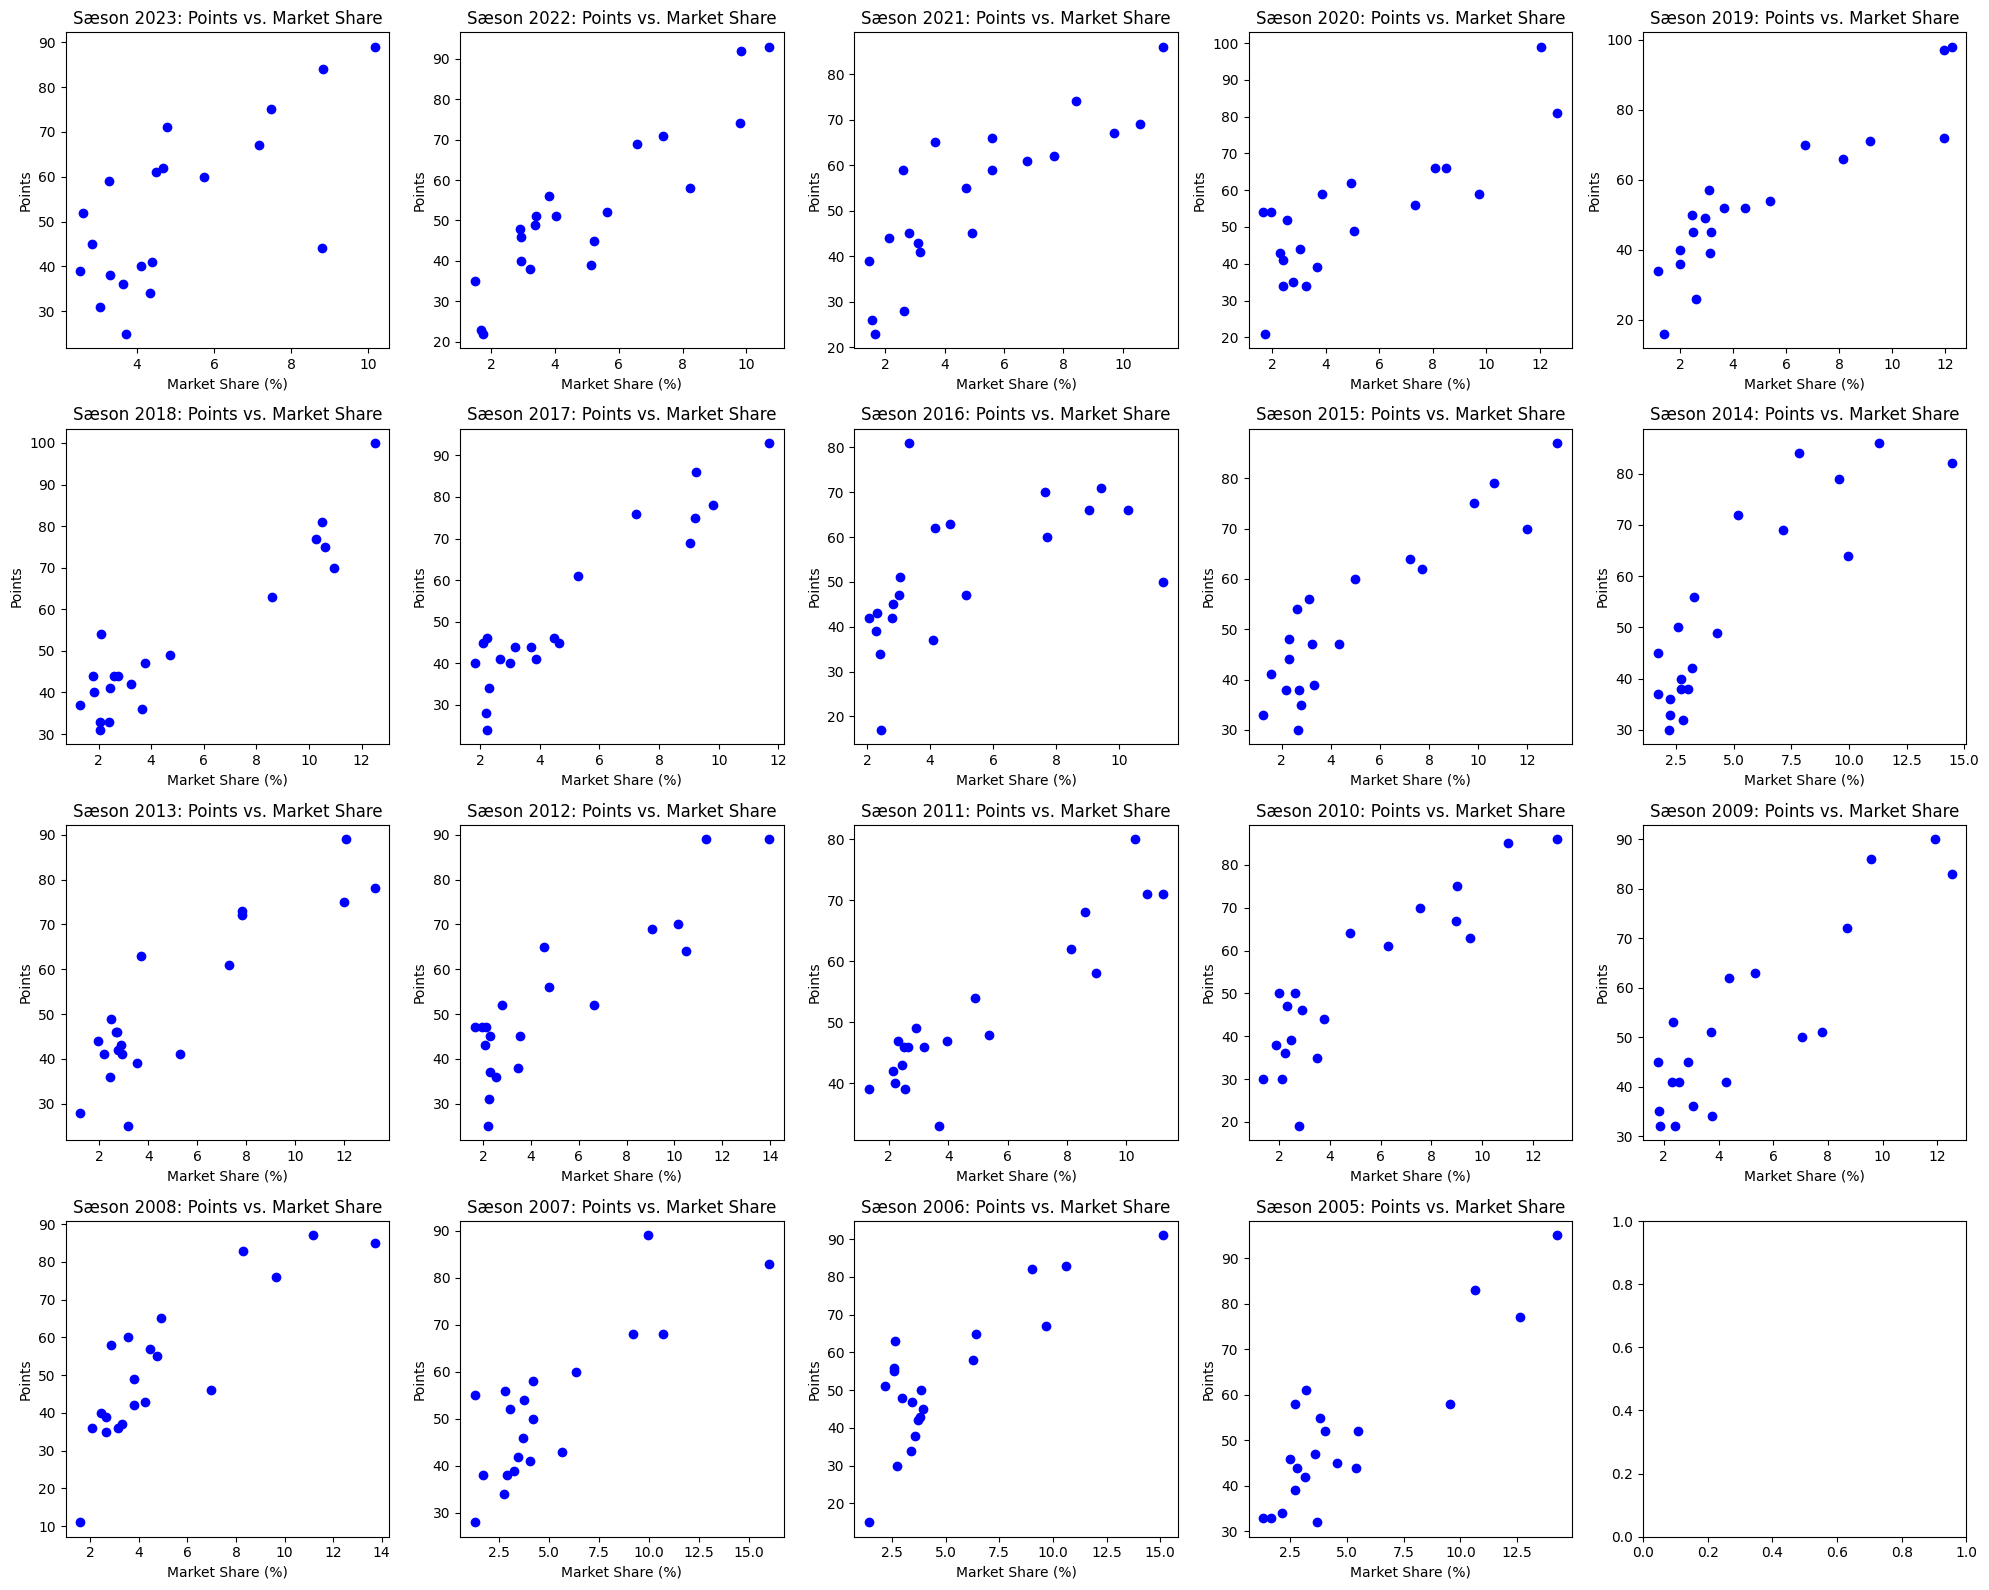

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  

axes = axes.flatten()


for i, (år, df) in enumerate(points_market.items()):
    if df['Market Share (%)'].dtype == object:
        df['Market Share (%)'] = df['Market Share (%)'].str.replace('%', '').astype(float)
    
    axes[i].scatter(df['Market Share (%)'], df['Pts'], color='blue')
    
    axes[i].set_title(f'Sæson {år}: Points vs. Market Share')
    axes[i].set_xlabel('Market Share (%)')
    axes[i].set_ylabel('Points')

plt.tight_layout()
plt.show()


# Correlation between Market share and points

In [53]:
import pandas as pd

df = points_market['2023']

if df['Market Share (%)'].dtype == object:
    df['Market Share (%)'] = df['Market Share (%)'].str.replace('%', '').astype(float)

correlation = df['Pts'].corr(df['Market Share (%)'])

print(f"Korrelationen mellem points og markedsandelsprocent for 2023 er: {correlation}")


Korrelationen mellem points og markedsandelsprocent for 2023 er: 0.7013141972642931


In [54]:

for år, df in points_market.items():
    if df['Market Share (%)'].dtype == object:
        df['Market Share (%)'] = df['Market Share (%)'].str.replace('%', '').astype(float)
    
    correlation = df['Pts'].corr(df['Market Share (%)'])
    print(f"Correlation between points and markedsandelsprocent for {år} is: {correlation:.3f}")


Correlation between points and markedsandelsprocent for 2023 is: 0.701
Correlation between points and markedsandelsprocent for 2022 is: 0.901
Correlation between points and markedsandelsprocent for 2021 is: 0.841
Correlation between points and markedsandelsprocent for 2020 is: 0.824
Correlation between points and markedsandelsprocent for 2019 is: 0.908
Correlation between points and markedsandelsprocent for 2018 is: 0.936
Correlation between points and markedsandelsprocent for 2017 is: 0.944
Correlation between points and markedsandelsprocent for 2016 is: 0.555
Correlation between points and markedsandelsprocent for 2015 is: 0.911
Correlation between points and markedsandelsprocent for 2014 is: 0.873
Correlation between points and markedsandelsprocent for 2013 is: 0.880
Correlation between points and markedsandelsprocent for 2012 is: 0.884
Correlation between points and markedsandelsprocent for 2011 is: 0.918
Correlation between points and markedsandelsprocent for 2010 is: 0.891
Correl

# Regression analysis

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     985.9
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          2.27e-107
Time:                        13:46:34   Log-Likelihood:                -1383.7
No. Observations:                 380   AIC:                             2771.
Df Residuals:                     378   BIC:                             2779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.1516      0.851  

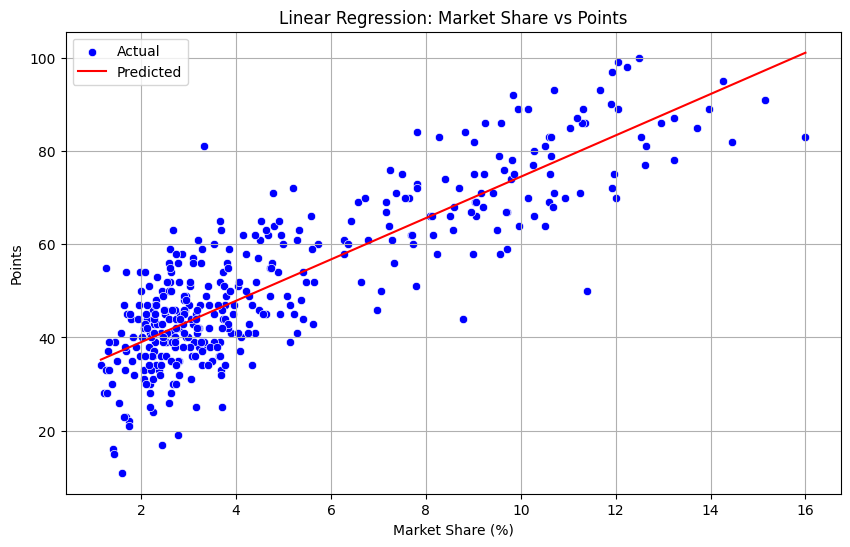

In [55]:

data_frames = []
for season, df in points_market.items():
    df['Season'] = season  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)


X = combined_df[['Market Share (%)']]
y = combined_df['Pts']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)

combined_df['Predicted Points'] = model.predict(X)

mse = mean_squared_error(y, combined_df['Predicted Points'])
r2 = r2_score(y, combined_df['Predicted Points'])
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y='Pts', data=combined_df, color='blue', label='Actual')
sns.lineplot(x='Market Share (%)', y='Predicted Points', data=combined_df, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points')
plt.legend()
plt.grid(True)
plt.show()


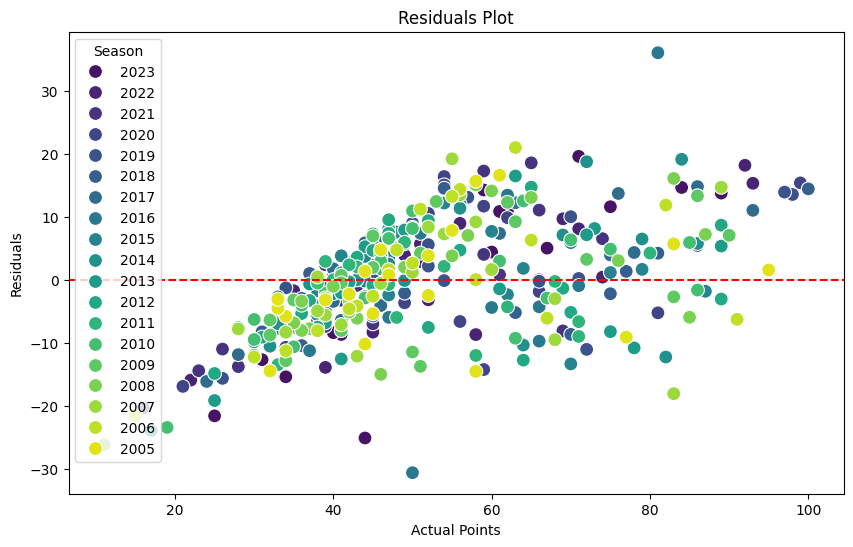

In [57]:
combined_df['Residuals'] = combined_df['Pts'] - combined_df['Predicted Points']

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['Pts'], y=combined_df['Residuals'], hue=combined_df['Season'], palette='viridis', s=100)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Points')
plt.ylabel('Residuals')
plt.legend(title='Season')
plt.show()

In [214]:
# Log

Mean Squared Error: 97.14387080930491
R-squared: 0.6838515729466282
Root Mean Squared Error (RMSE): 9.856159029221521


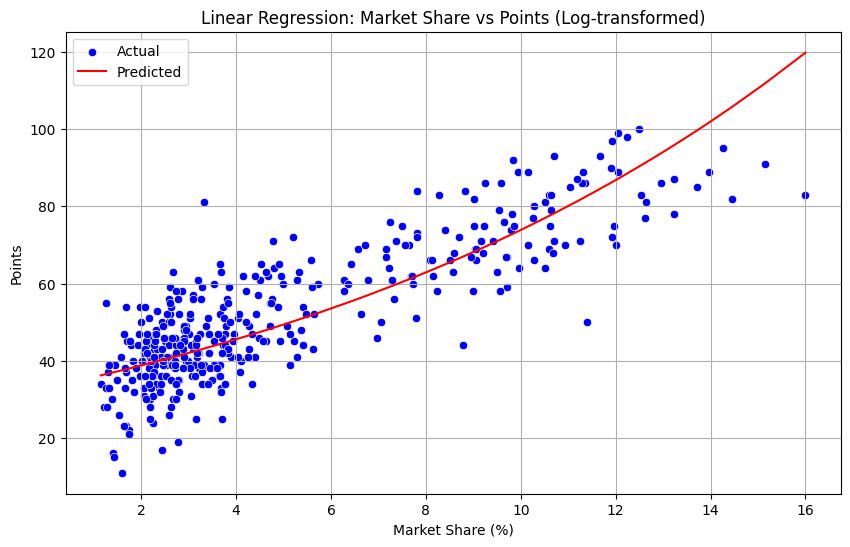

In [215]:



data_frames = []
for season, df in points_market.items():
    df['Season'] = season  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

X = combined_df[['Market Share (%)']]
y = np.log(combined_df['Pts']) 


reg = LinearRegression()
reg.fit(X, y)
y_pred_log = reg.predict(X)

y_pred = np.exp(y_pred_log)

combined_df['Predicted Points'] = y_pred

mse = mean_squared_error(combined_df['Pts'], y_pred)
r2 = r2_score(combined_df['Pts'], y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y='Pts', data=combined_df, color='blue', label='Actual')
sns.lineplot(x='Market Share (%)', y='Predicted Points', data=combined_df, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points (Log-transformed)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 85.16163735311436
R-squared: 0.7228469745937085
Root Mean Squared Error (RMSE): 9.228306310104491


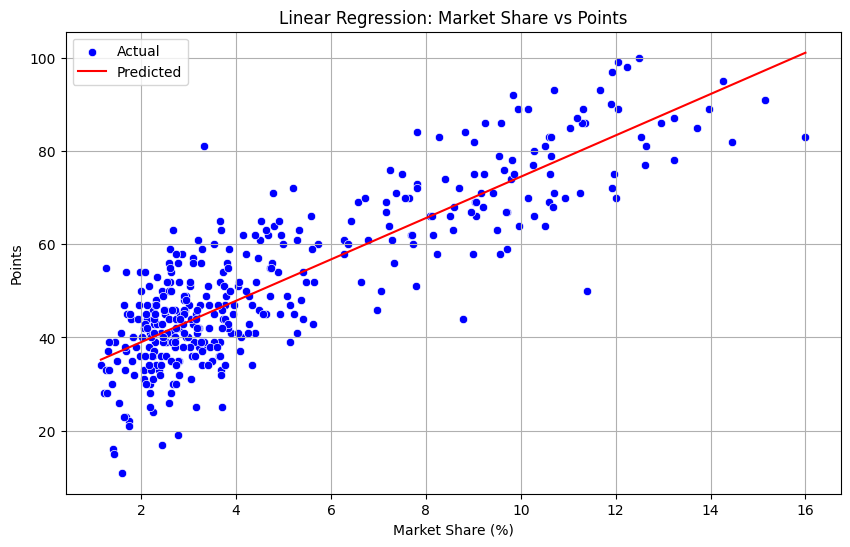

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

data_frames = []
for season, df in points_market.items():
    df['Season'] = season  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

X = combined_df[['Market Share (%)']]
y = combined_df['Pts']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)


combined_df['Predicted Points'] = y_pred

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y='Pts', data=combined_df, color='blue', label='Actual')
sns.lineplot(x='Market Share (%)', y='Predicted Points', data=combined_df, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points')
plt.legend()
plt.grid(True)
plt.show()

# Out of sample test by linear regression

Training Data Evaluation:
Mean Squared Error: 85.16163735311436
R-squared: 0.7228469745937085
Root Mean Squared Error (RMSE): 9.228306310104491
               Club  adjusted_market_share (%)  Predicted Points 2026
0   Manchester City                  10.241987              75.546580
1           Arsenal                   8.901255              69.604125
2           Chelsea                   8.860932              69.425404
3    Manchester Utd                   7.550441              63.616989
4         Liverpool                   7.227859              62.187226
5         Tottenham                   5.776239              55.753289
6     Newcastle Utd                   4.818573              51.508678
7          Brighton                   4.717766              51.061877
8       Aston Villa                   4.384526              49.584878
9            Wolves                   4.435506              49.810834
10   Leicester City                   4.375022              49.542753
11         West 

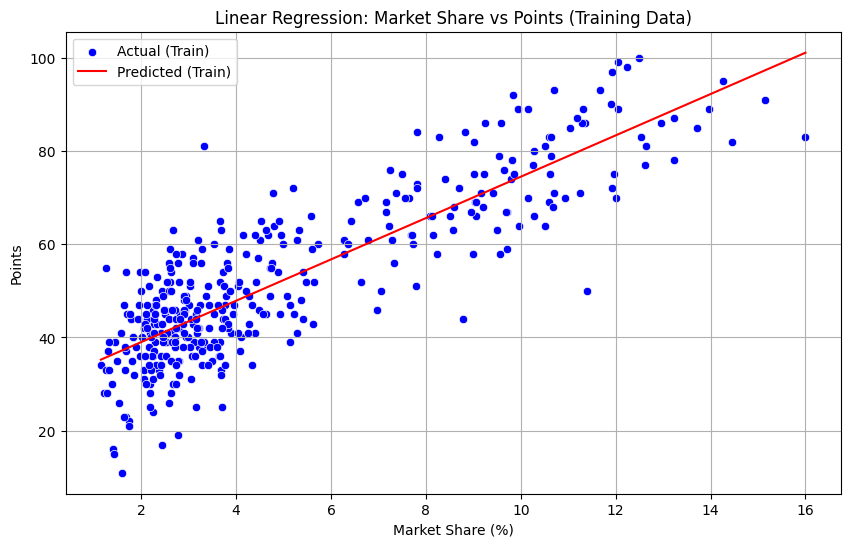

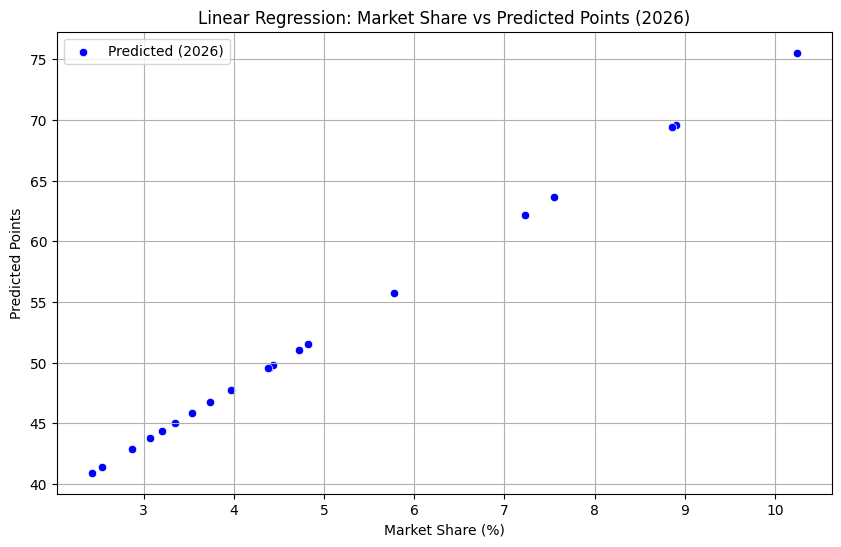

In [306]:

data_frames = []
for season, df in points_market.items():
    df['Season'] = str(season) 
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

train_seasons = [str(year) for year in range(2005, 2024)] 

train_df = combined_df[combined_df['Season'].isin(train_seasons)]

X_train = train_df[['Market Share (%)']]
y_train = train_df['Pts']

reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print("Training Data Evaluation:")
print(f'Mean Squared Error: {train_mse}')
print(f'R-squared: {train_r2}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')

X_2026 = adjusted_market_share_df[['adjusted_market_share (%)']]
X_2026.columns = ['Market Share (%)']  
y_2026_pred = reg.predict(X_2026)

adjusted_market_share_df['Predicted Points 2026'] = y_2026_pred

print(adjusted_market_share_df[['Club', 'adjusted_market_share (%)', 'Predicted Points 2026']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y=y_train, data=X_train.join(y_train), color='blue', label='Actual (Train)')
sns.lineplot(x='Market Share (%)', y=y_train_pred, data=X_train.join(pd.Series(y_train_pred, name='Predicted Points (Train)')), color='red', label='Predicted (Train)')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='adjusted_market_share (%)', y='Predicted Points 2026', data=adjusted_market_share_df, color='blue', label='Predicted (2026)')
plt.xlabel('Market Share (%)')
plt.ylabel('Predicted Points')
plt.title('Linear Regression: Market Share vs Predicted Points (2026)')
plt.legend()
plt.grid(True)
plt.show()


In [309]:

predicted_points_2026 = adjusted_market_share_df[['Club', 'Predicted Points 2026']].copy()

total_predicted_points_2026 = predicted_points_2026['Predicted Points 2026'].sum()

predicted_points_2026['pi'] = predicted_points_2026['Predicted Points 2026'] / total_predicted_points_2026

hhicb_2026 = len(predicted_points_2026) * (predicted_points_2026['pi']**2).sum()

hhicb_2026_data = pd.DataFrame([{'Year': 2026, 'HHICB': hhicb_2026}])

hhicb_df['Year'] = hhicb_df['Year'].astype(int)
hhicb_df = pd.concat([hhicb_df, hhicb_2026_data], ignore_index=True)

hhicb_df = hhicb_df.sort_values('Year').reset_index(drop=True)

print(hhicb_df)


    Year     HHICB
0   2005  1.104534
1   2006  1.116473
2   2007  1.087934
3   2008  1.136834
4   2009  1.116166
5   2010  1.126355
6   2011  1.058610
7   2012  1.105428
8   2013  1.113289
9   2014  1.125156
10  2015  1.092657
11  2016  1.084877
12  2017  1.134283
13  2018  1.128875
14  2019  1.146749
15  2020  1.109310
16  2021  1.096998
17  2022  1.128504
18  2023  1.113393
19  2026  1.036805
20  2026  1.036805


Training Data Evaluation:
Mean Squared Error: 80.0818280508772
R-squared: 0.7383386956292608
Root Mean Squared Error (RMSE): 8.948845067989344

Test Data Evaluation:
Mean Squared Error: 113.03044490592495
R-squared: 0.6395827782726158
Root Mean Squared Error (RMSE): 10.631577724210313


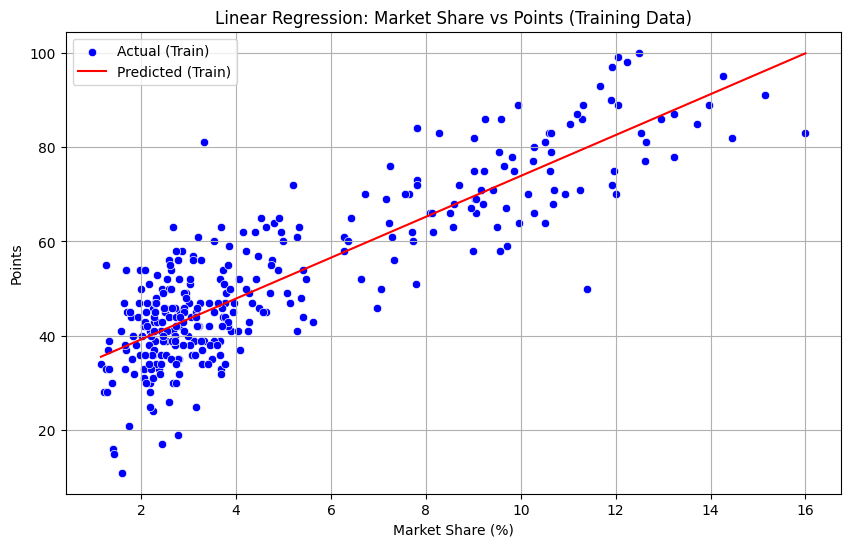

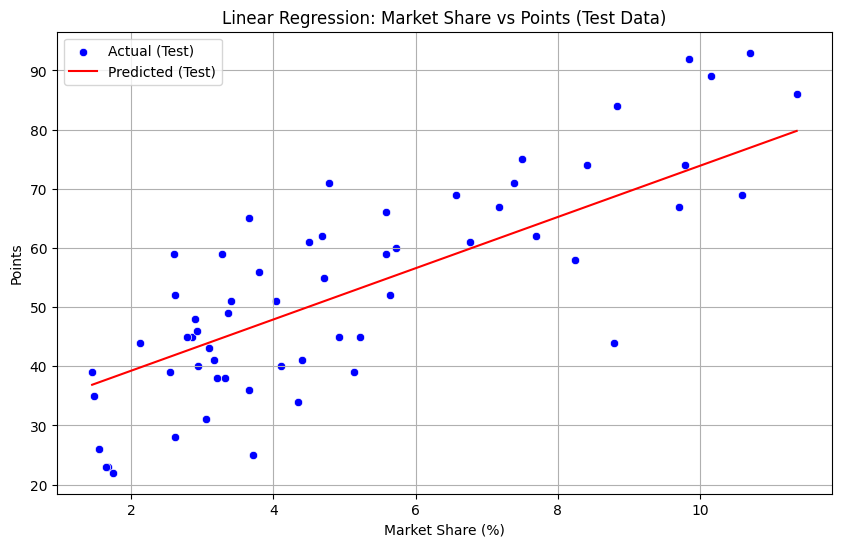

In [304]:

data_frames = []
for season, df in points_market.items():
    df['Season'] = str(season) 
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

train_seasons = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]

train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]

X_train = train_df[['Market Share (%)']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)']]
y_test = test_df['Pts']

reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print("Training Data Evaluation:")
print(f'Mean Squared Error: {train_mse}')
print(f'R-squared: {train_r2}')
print(f'Root Mean Squared Error (RMSE): {train_rmse}')

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("\nTest Data Evaluation:")
print(f'Mean Squared Error: {test_mse}')
print(f'R-squared: {test_r2}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y=y_train, data=X_train.join(y_train), color='blue', label='Actual (Train)')
sns.lineplot(x='Market Share (%)', y=y_train_pred, data=X_train.join(pd.Series(y_train_pred, name='Predicted Points (Train)')), color='red', label='Predicted (Train)')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y=y_test, data=X_test.join(y_test), color='blue', label='Actual (Test)')
sns.lineplot(x='Market Share (%)', y=y_test_pred, data=X_test.join(pd.Series(y_test_pred, name='Predicted Points (Test)')), color='red', label='Predicted (Test)')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points (Test Data)')
plt.legend()
plt.grid(True)
plt.show()


# Machine Learning models

In [211]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

data_frames = []
for season, df in points_market.items():
    df['Season'] = str(season)  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

train_seasons = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]

train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]

X_train = train_df[['Market Share (%)']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)']]
y_test = test_df['Pts']

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    print(f"\n{model.__class__.__name__} - Training Data Evaluation:")
    print(f'Mean Squared Error: {train_mse}')
    print(f'R-squared: {train_r2}')
    print(f'Root Mean Squared Error (RMSE): {train_rmse}')

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    print(f"\n{model.__class__.__name__} - Test Data Evaluation:")
    print(f'Mean Squared Error: {test_mse}')
    print(f'R-squared: {test_r2}')
    print(f'Root Mean Squared Error (RMSE): {test_rmse}')


for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)



LinearRegression - Training Data Evaluation:
Mean Squared Error: 80.0818280508772
R-squared: 0.7383386956292608
Root Mean Squared Error (RMSE): 8.948845067989344

LinearRegression - Test Data Evaluation:
Mean Squared Error: 113.03044490592495
R-squared: 0.6395827782726158
Root Mean Squared Error (RMSE): 10.631577724210313

Ridge - Training Data Evaluation:
Mean Squared Error: 80.08184323966081
R-squared: 0.7383386460010615
Root Mean Squared Error (RMSE): 8.948845916634212

Ridge - Test Data Evaluation:
Mean Squared Error: 113.04683487134908
R-squared: 0.6395305160187842
Root Mean Squared Error (RMSE): 10.632348511563618

Lasso - Training Data Evaluation:
Mean Squared Error: 80.16481294277843
R-squared: 0.73806754878376
Root Mean Squared Error (RMSE): 8.953480493237166

Lasso - Test Data Evaluation:
Mean Squared Error: 114.29177577410016
R-squared: 0.6355608055415958
Root Mean Squared Error (RMSE): 10.690733172897927

ElasticNet - Training Data Evaluation:
Mean Squared Error: 80.625254

In [316]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

data_frames = []
for season, df in points_market.items():
    df['Season'] = str(season)  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

train_seasons = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]

train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]

X_train = train_df[['Market Share (%)']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)']]
y_test = test_df['Pts']

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'AdaBoost': AdaBoostRegressor(n_estimators=500),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    print(f"\n{model.__class__.__name__} - Training Data Evaluation:")
    print(f'Mean Squared Error: {train_mse}')
    print(f'R-squared: {train_r2}')
    print(f'Root Mean Squared Error (RMSE): {train_rmse}')

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    print(f"\n{model.__class__.__name__} - Test Data Evaluation:")
    print(f'Mean Squared Error: {test_mse}')
    print(f'R-squared: {test_r2}')
    print(f'Root Mean Squared Error (RMSE): {test_rmse}')

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)



LinearRegression - Training Data Evaluation:
Mean Squared Error: 80.0818280508772
R-squared: 0.7383386956292608
Root Mean Squared Error (RMSE): 8.948845067989344

LinearRegression - Test Data Evaluation:
Mean Squared Error: 113.03044490592495
R-squared: 0.6395827782726158
Root Mean Squared Error (RMSE): 10.631577724210313

Ridge - Training Data Evaluation:
Mean Squared Error: 80.08184323966081
R-squared: 0.7383386460010615
Root Mean Squared Error (RMSE): 8.948845916634212

Ridge - Test Data Evaluation:
Mean Squared Error: 113.04683487134908
R-squared: 0.6395305160187842
Root Mean Squared Error (RMSE): 10.632348511563618

Lasso - Training Data Evaluation:
Mean Squared Error: 80.16481294277843
R-squared: 0.73806754878376
Root Mean Squared Error (RMSE): 8.953480493237166

Lasso - Test Data Evaluation:
Mean Squared Error: 114.29177577410016
R-squared: 0.6355608055415958
Root Mean Squared Error (RMSE): 10.690733172897927

ElasticNet - Training Data Evaluation:
Mean Squared Error: 80.625254

In [318]:

data_frames = []
for season, df in points_market.items():
    df['Season'] = str(season) 
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

train_seasons = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]

train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]

X_train = train_df[['Market Share (%)']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)']]
y_test = test_df['Pts']

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'AdaBoost': AdaBoostRegressor(n_estimators=500),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    print(f"\n{model.__class__.__name__} - Training Data Evaluation:")
    print(f'Mean Squared Error: {train_mse}')
    print(f'R-squared: {train_r2}')
    print(f'Root Mean Squared Error (RMSE): {train_rmse}')

    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    print(f"\n{model.__class__.__name__} - Test Data Evaluation:")
    print(f'Mean Squared Error: {test_mse}')
    print(f'R-squared: {test_r2}')
    print(f'Root Mean Squared Error (RMSE): {test_rmse}')

    if isinstance(model, RandomForestRegressor):
        print(f'Number of variables RandomForest splits on (max_features): {model.max_features}')

for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)



LinearRegression - Training Data Evaluation:
Mean Squared Error: 80.0818280508772
R-squared: 0.7383386956292608
Root Mean Squared Error (RMSE): 8.948845067989344

LinearRegression - Test Data Evaluation:
Mean Squared Error: 113.03044490592495
R-squared: 0.6395827782726158
Root Mean Squared Error (RMSE): 10.631577724210313

Ridge - Training Data Evaluation:
Mean Squared Error: 80.08184323966081
R-squared: 0.7383386460010615
Root Mean Squared Error (RMSE): 8.948845916634212

Ridge - Test Data Evaluation:
Mean Squared Error: 113.04683487134908
R-squared: 0.6395305160187842
Root Mean Squared Error (RMSE): 10.632348511563618

Lasso - Training Data Evaluation:
Mean Squared Error: 80.16481294277843
R-squared: 0.73806754878376
Root Mean Squared Error (RMSE): 8.953480493237166

Lasso - Test Data Evaluation:
Mean Squared Error: 114.29177577410016
R-squared: 0.6355608055415958
Root Mean Squared Error (RMSE): 10.690733172897927

ElasticNet - Training Data Evaluation:
Mean Squared Error: 80.625254

# Test on the last 6 seasons

Available seasons in points_market: dict_keys(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005'])
Recent seasons to analyze: ['2018', '2019', '2020', '2021', '2022', '2023']
Mean Squared Error: 90.44700395441845
R-squared: 0.730067137900696
Root Mean Squared Error (RMSE): 9.510362977006633


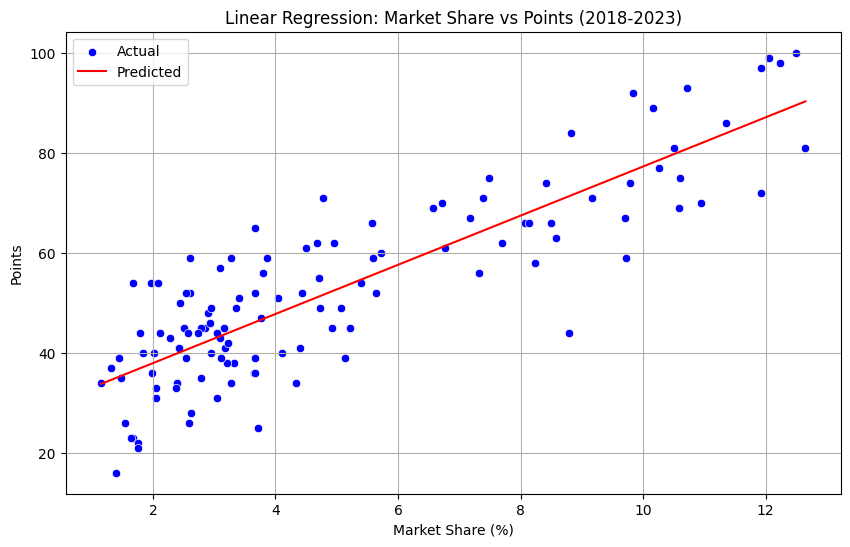

In [188]:

recent_seasons = ["2018", "2019", "2020", "2021", "2022", "2023"]

print("Available seasons in points_market:", points_market.keys())
print("Recent seasons to analyze:", recent_seasons)

recent_data_frames = [df for season, df in points_market.items() if season in recent_seasons]

if not recent_data_frames:
    raise ValueError("No data frames found for the specified recent seasons.")

combined_df = pd.concat(recent_data_frames, ignore_index=True)

X = combined_df[['Market Share (%)']]
y = combined_df['Pts']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

combined_df['Predicted Points'] = y_pred

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y='Pts', data=combined_df, color='blue', label='Actual')
sns.lineplot(x='Market Share (%)', y='Predicted Points', data=combined_df, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points (2018-2023)')
plt.legend()
plt.grid(True)
plt.show()

# XGboost pr sæson

Mean Squared Error: 160.0222579875226
R-squared: 0.4897412136490462
Root Mean Squared Error (RMSE): 12.649990434285815


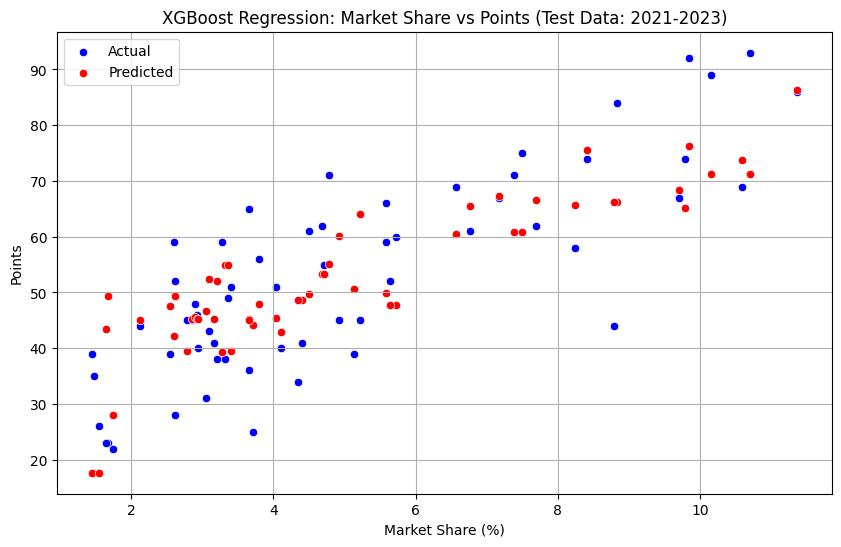

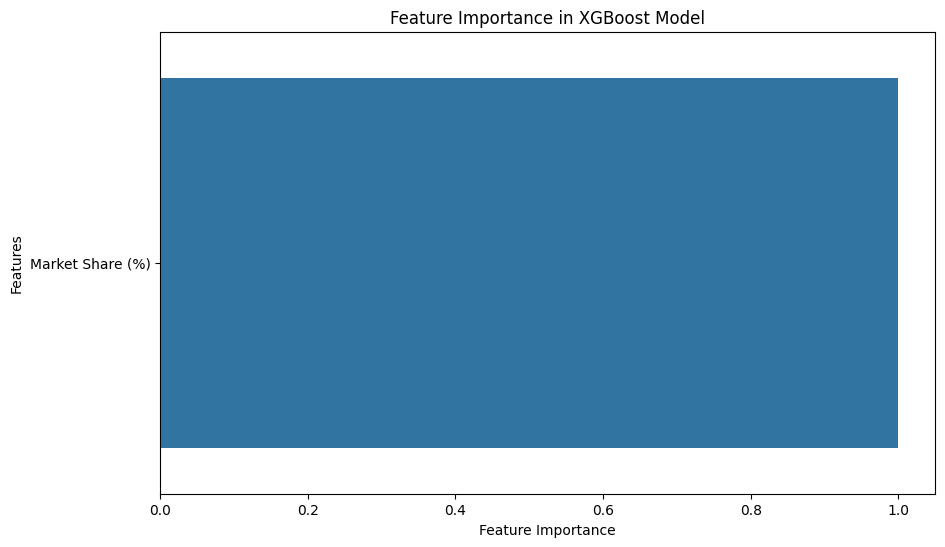

Training Seasons: ['2005', '2006', '2007', '2008', '2009, 2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Test Seasons: ['2021', '2022', '2023']


In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

data_frames = []
for season, df in points_market.items():
    df['Season'] = season  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)


train_seasons = ["2005", "2006", "2007", "2008", "2009, 2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]

train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]

X_train = train_df[['Market Share (%)']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)']]
y_test = test_df['Pts']

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Market Share (%)'], y=y_test, color='blue', label='Actual')
sns.scatterplot(x=X_test['Market Share (%)'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('XGBoost Regression: Market Share vs Points (Test Data: 2021-2023)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=['Market Share (%)'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.show()

print(f'Training Seasons: {train_seasons}')
print(f'Test Seasons: {test_seasons}')


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.6}
Mean Squared Error: 118.1724914139321
R-squared: 0.6231864691370425
Root Mean Squared Error (RMSE): 10.870717152696601


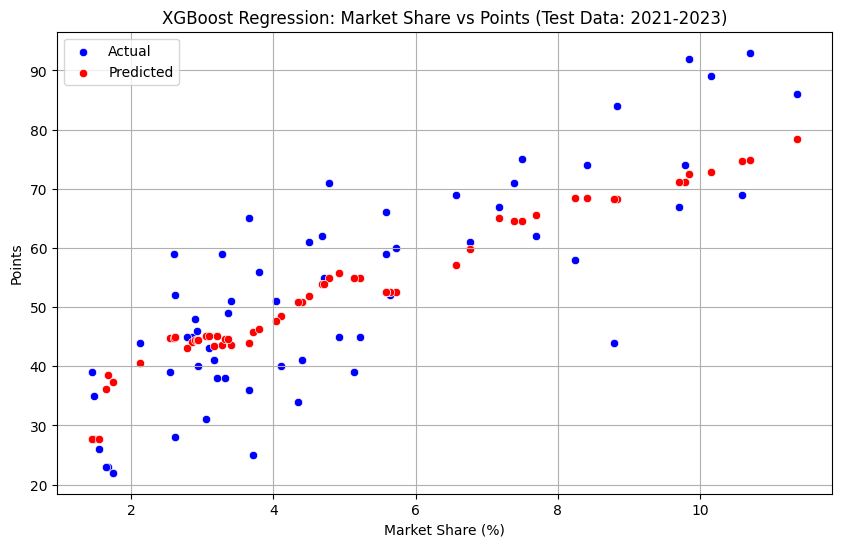

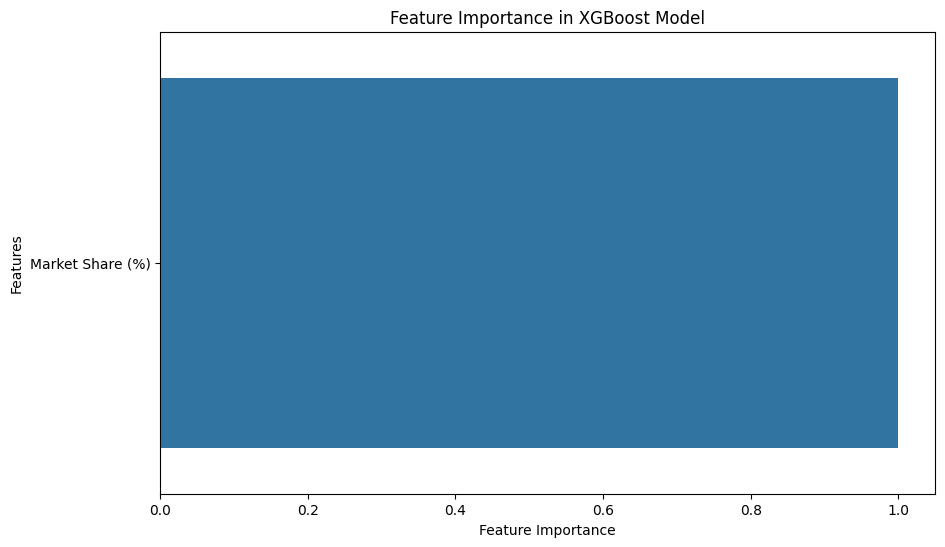

In [198]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV



data_frames = []
for season, df in points_market.items():
    df['Season'] = season  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)


train_seasons = ["2005", "2006", "2007", "2008", "2009, 2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]


train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]


X_train = train_df[['Market Share (%)']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)']]
y_test = test_df['Pts']

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Market Share (%)'], y=y_test, color='blue', label='Actual')
sns.scatterplot(x=X_test['Market Share (%)'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('XGBoost Regression: Market Share vs Points (Test Data: 2021-2023)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=['Market Share (%)'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.show()


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.6}
Mean Squared Error: 117.05881712463888
R-squared: 0.6267376131990725
Root Mean Squared Error (RMSE): 10.819372307330905


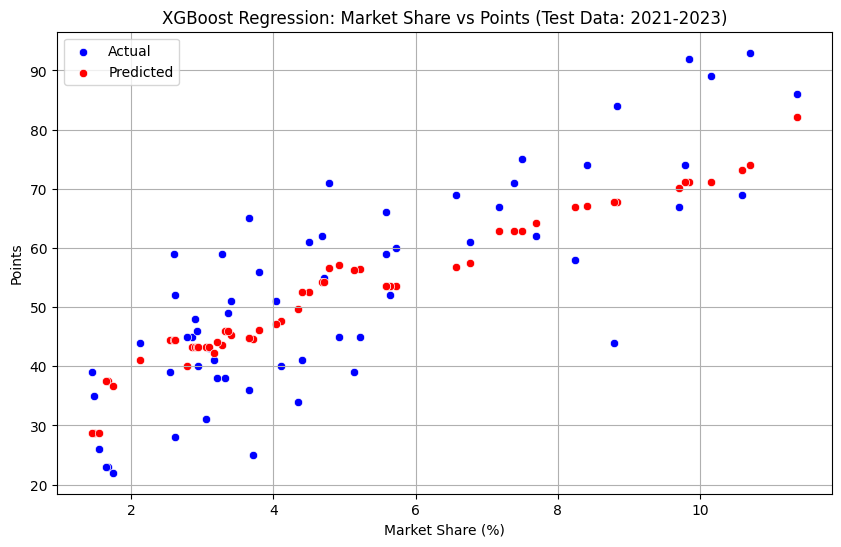

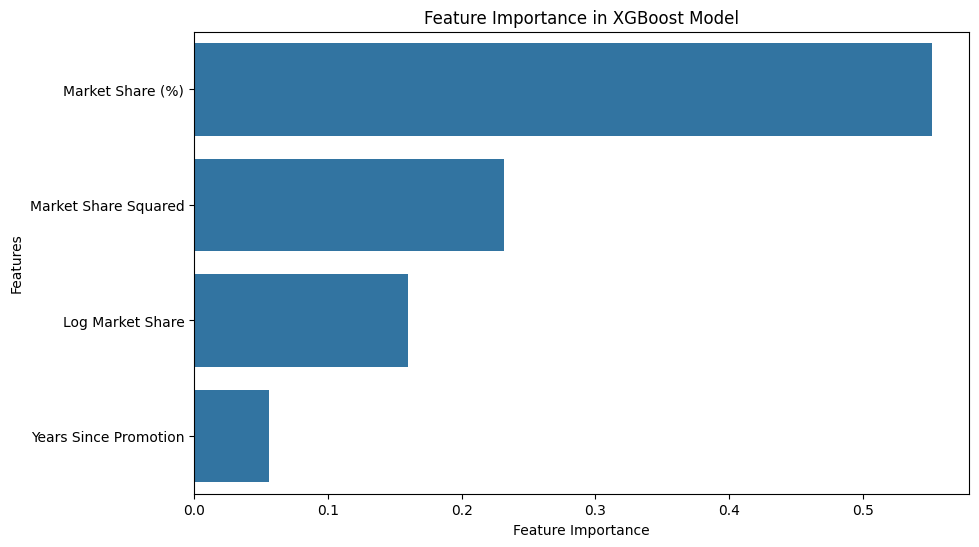

Training Seasons: ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Test Seasons: ['2021', '2022', '2023']


In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


data_frames = []
for season, df in points_market.items():
    df['Season'] = str(season) 
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)


combined_df['Market Share Squared'] = combined_df['Market Share (%)'] ** 2

combined_df['Log Market Share'] = np.log(combined_df['Market Share (%)'])

combined_df['Years Since Promotion'] = 2023 - combined_df['Season'].astype(int)

train_seasons = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]

train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]

X_train = train_df[['Market Share (%)', 'Market Share Squared', 'Log Market Share', 'Years Since Promotion']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)', 'Market Share Squared', 'Log Market Share', 'Years Since Promotion']]
y_test = test_df['Pts']


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


xgb_model = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Market Share (%)'], y=y_test, color='blue', label='Actual')
sns.scatterplot(x=X_test['Market Share (%)'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('XGBoost Regression: Market Share vs Points (Test Data: 2021-2023)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=['Market Share (%)', 'Market Share Squared', 'Log Market Share', 'Years Since Promotion'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.show()

print(f'Training Seasons: {train_seasons}')
print(f'Test Seasons: {test_seasons}')


# New try with former seasons point

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Mean Squared Error: 131.78546455617507
R-squared: 0.5797791379223397
Root Mean Squared Error (RMSE): 11.479785039632715


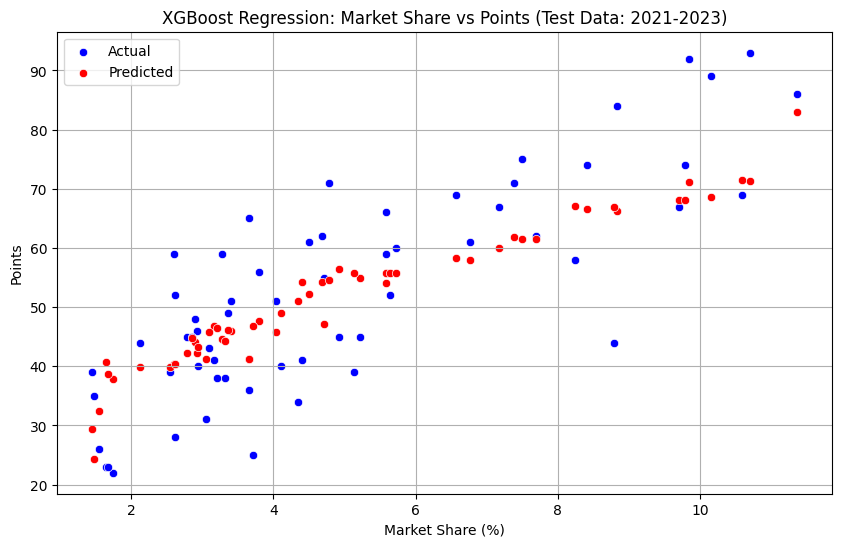

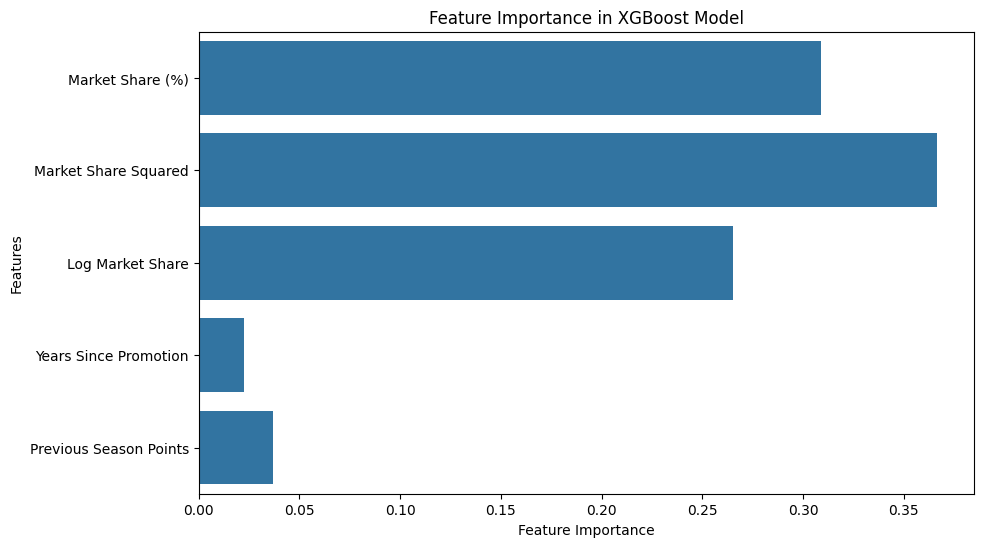

Training Seasons: ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Test Seasons: ['2021', '2022', '2023']


In [204]:

data_frames = []
for season, df in points_market.items():
    df['Season'] = str(season) 
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

combined_df = combined_df.sort_values(by=['Season', 'Club'], ascending=[True, True])


combined_df['Previous Season Points'] = combined_df.groupby('Club')['Pts'].shift(1)

average_low_points = combined_df.groupby('Season')['Pts'].apply(lambda x: x.nsmallest(5).mean())

for season in combined_df['Season'].unique():
    if season != '2005':  
        prev_season = str(int(season) - 1)
        avg_points = average_low_points.loc[prev_season]
        combined_df.loc[(combined_df['Season'] == season) & (combined_df['Previous Season Points'].isnull()), 'Previous Season Points'] = avg_points

combined_df['Previous Season Points'] = combined_df['Previous Season Points'].fillna(average_low_points.mean())


combined_df['Market Share Squared'] = combined_df['Market Share (%)'] ** 2

combined_df['Log Market Share'] = np.log(combined_df['Market Share (%)'])

combined_df['Years Since Promotion'] = 2023 - combined_df['Season'].astype(int)

train_seasons = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
test_seasons = ["2021", "2022", "2023"]

train_df = combined_df[combined_df['Season'].isin(train_seasons)]
test_df = combined_df[combined_df['Season'].isin(test_seasons)]

X_train = train_df[['Market Share (%)', 'Market Share Squared', 'Log Market Share', 'Years Since Promotion', 'Previous Season Points']]
y_train = train_df['Pts']
X_test = test_df[['Market Share (%)', 'Market Share Squared', 'Log Market Share', 'Years Since Promotion', 'Previous Season Points']]
y_test = test_df['Pts']

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Market Share (%)'], y=y_test, color='blue', label='Actual')
sns.scatterplot(x=X_test['Market Share (%)'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('XGBoost Regression: Market Share vs Points (Test Data: 2021-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=['Market Share (%)', 'Market Share Squared', 'Log Market Share', 'Years Since Promotion', 'Previous Season Points'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.show()

print(f'Training Seasons: {train_seasons}')
print(f'Test Seasons: {test_seasons}')


In [175]:
output_dir = 'points_market_data'
os.makedirs(output_dir, exist_ok=True)

for season, points_market_df in points_market.items():
    filename = os.path.join(output_dir, f"points_market_{season}.csv")
    points_market_df.to_csv(filename, index=False)
    print(f"Saved {season} data to {filename}")

Saved 2023 data to points_market_data\points_market_2023.csv
Saved 2022 data to points_market_data\points_market_2022.csv
Saved 2021 data to points_market_data\points_market_2021.csv
Saved 2020 data to points_market_data\points_market_2020.csv
Saved 2019 data to points_market_data\points_market_2019.csv
Saved 2018 data to points_market_data\points_market_2018.csv
Saved 2017 data to points_market_data\points_market_2017.csv
Saved 2016 data to points_market_data\points_market_2016.csv
Saved 2015 data to points_market_data\points_market_2015.csv
Saved 2014 data to points_market_data\points_market_2014.csv
Saved 2013 data to points_market_data\points_market_2013.csv
Saved 2012 data to points_market_data\points_market_2012.csv
Saved 2011 data to points_market_data\points_market_2011.csv
Saved 2010 data to points_market_data\points_market_2010.csv
Saved 2009 data to points_market_data\points_market_2009.csv
Saved 2008 data to points_market_data\points_market_2008.csv
Saved 2007 data to point

In [160]:


data_frames = [df for df in points_market.values()]
combined_df = pd.concat(data_frames)

train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)

In [162]:

X_train = train_df.drop(columns=['Club', 'Pts'])
y_train = train_df['Pts']
X_test = test_df.drop(columns=['Club', 'Pts'])
y_test = test_df['Pts']

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round, evals=[(dtest, 'test')], early_stopping_rounds=10)

y_pred = model.predict(dtest)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ", rmse)


[0]	test-rmse:14.88297
[1]	test-rmse:13.89964
[2]	test-rmse:13.02464
[3]	test-rmse:12.25337
[4]	test-rmse:11.60719
[5]	test-rmse:11.04665
[6]	test-rmse:10.58291
[7]	test-rmse:10.19305
[8]	test-rmse:9.89316
[9]	test-rmse:9.62688
[10]	test-rmse:9.40066
[11]	test-rmse:9.23422
[12]	test-rmse:9.09174
[13]	test-rmse:8.97346
[14]	test-rmse:8.88227
[15]	test-rmse:8.80972
[16]	test-rmse:8.74523
[17]	test-rmse:8.71916
[18]	test-rmse:8.69258
[19]	test-rmse:8.66523
[20]	test-rmse:8.66553
[21]	test-rmse:8.65944
[22]	test-rmse:8.69194
[23]	test-rmse:8.70156
[24]	test-rmse:8.67845
[25]	test-rmse:8.70821
[26]	test-rmse:8.71193
[27]	test-rmse:8.73922
[28]	test-rmse:8.74146
[29]	test-rmse:8.75226
[30]	test-rmse:8.77205
RMSE:  8.789732012601299


C:\Users\andre\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [164]:
season2023 = points_market["2023"]
X_new = season2023[['Market Share (%)']]


dnew = xgb.DMatrix(X_new)


predicted_points = model.predict(dnew)

season2023['Predicted Pts'] = predicted_points

print(season2023)

               Club  Pts  Market Share (%)  Predicted Pts
0   Manchester City   89             10.16      74.175377
1           Arsenal   84              8.83      68.287834
2    Manchester Utd   75              7.49      66.117264
3     Newcastle Utd   71              4.78      53.588612
4         Liverpool   67              7.17      65.207039
5          Brighton   62              4.68      53.588612
6       Aston Villa   61              4.50      54.197605
7         Tottenham   60              5.73      58.609921
8         Brentford   59              3.28      44.506977
9            Fulham   52              2.61      44.103001
10   Crystal Palace   45              2.85      44.506977
11          Chelsea   44              8.79      67.580193
12           Wolves   41              4.40      46.156830
13         West Ham   40              4.11      47.437866
14      Bournemouth   39              2.54      44.103001
15  Nott'ham Forest   38              3.32      44.506977
16          Ev

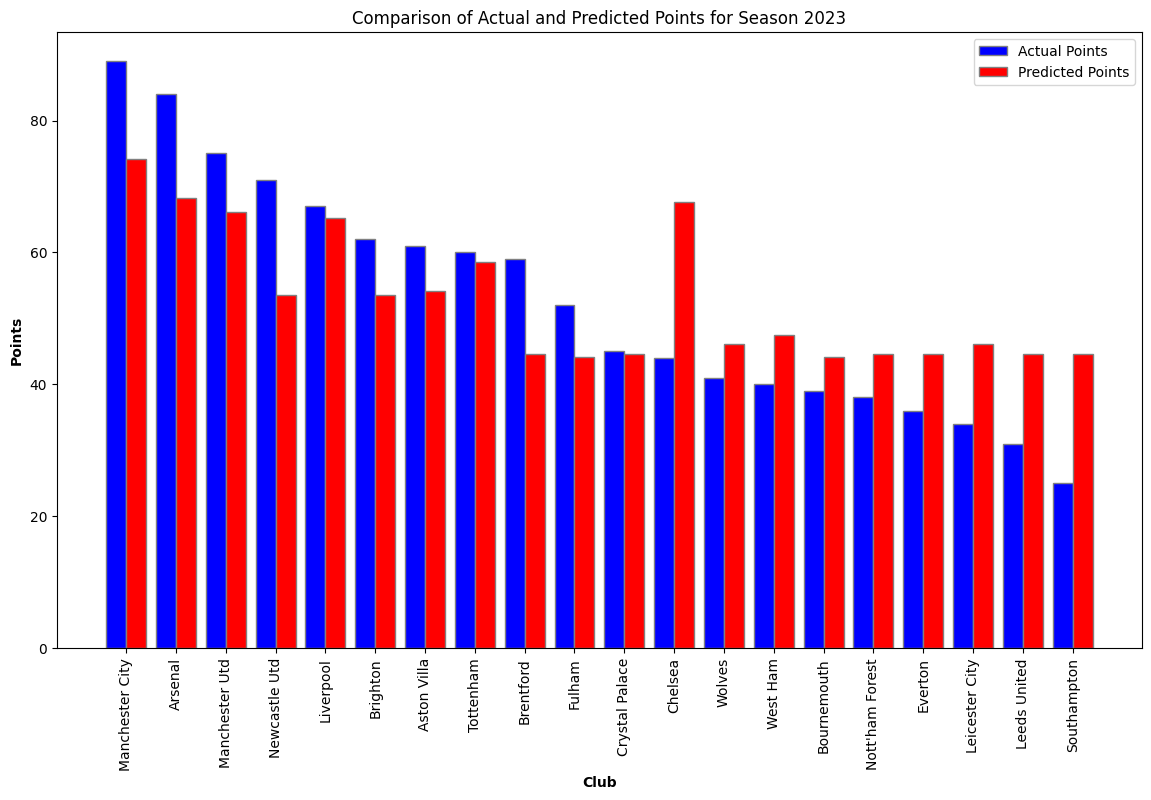

In [165]:


plt.figure(figsize=(14, 8))
bars_width = 0.4


r1 = range(len(season2023))
r2 = [x + bars_width for x in r1]

plt.bar(r1, season2023['Pts'], color='blue', width=bars_width, edgecolor='grey', label='Actual Points')
plt.bar(r2, season2023['Predicted Pts'], color='red', width=bars_width, edgecolor='grey', label='Predicted Points')

plt.xlabel('Club', fontweight='bold')
plt.ylabel('Points', fontweight='bold')
plt.title('Comparison of Actual and Predicted Points for Season 2023')

plt.xticks([r + bars_width/2 for r in range(len(season2023))], season2023['Club'], rotation=90)

plt.legend()

plt.show()


In [166]:

seasons_predicted = {}

for year, df in points_market.items():
    X = df[['Market Share (%)']]
    
    dmatrix = xgb.DMatrix(X)
    
    predicted_points = model.predict(dmatrix)
    
    predicted_df = df.copy()

    predicted_df['Predicted Pts'] = predicted_points
    
    seasons_predicted[year] = predicted_df


In [167]:
seasons_predicted

{'2023':                Club  Pts  Market Share (%)  Predicted Pts
 0   Manchester City   89             10.16      74.175377
 1           Arsenal   84              8.83      68.287834
 2    Manchester Utd   75              7.49      66.117264
 3     Newcastle Utd   71              4.78      53.588612
 4         Liverpool   67              7.17      65.207039
 5          Brighton   62              4.68      53.588612
 6       Aston Villa   61              4.50      54.197605
 7         Tottenham   60              5.73      58.609921
 8         Brentford   59              3.28      44.506977
 9            Fulham   52              2.61      44.103001
 10   Crystal Palace   45              2.85      44.506977
 11          Chelsea   44              8.79      67.580193
 12           Wolves   41              4.40      46.156830
 13         West Ham   40              4.11      47.437866
 14      Bournemouth   39              2.54      44.103001
 15  Nott'ham Forest   38              3.32     

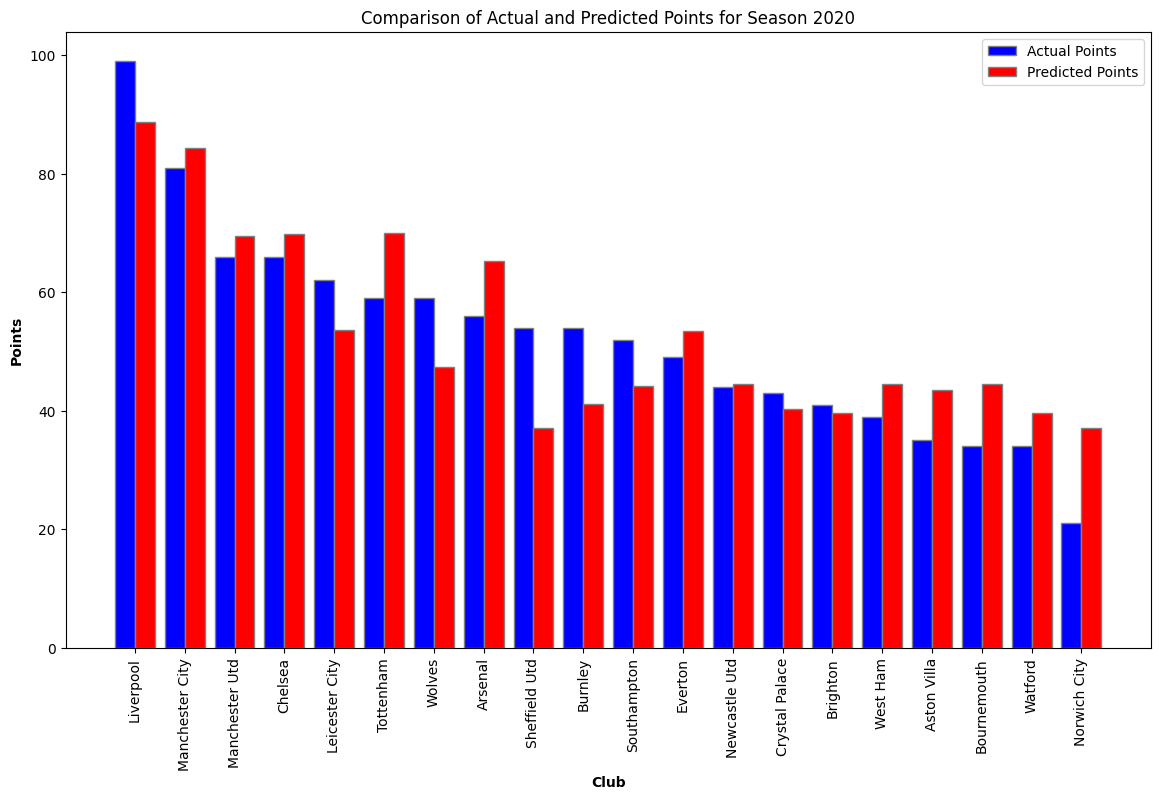

In [114]:

season_data = seasons_predicted['2020']

plt.figure(figsize=(14, 8))
bars_width = 0.4

r1 = range(len(season_data))
r2 = [x + bars_width for x in r1]

plt.bar(r1, season_data['Pts'], color='blue', width=bars_width, edgecolor='grey', label='Actual Points')
plt.bar(r2, season_data['Predicted Pts'], color='red', width=bars_width, edgecolor='grey', label='Predicted Points')

plt.xlabel('Club', fontweight='bold')
plt.ylabel('Points', fontweight='bold')
plt.title('Comparison of Actual and Predicted Points for Season 2020')

plt.xticks([r + bars_width/2 for r in range(len(season_data))], season_data['Club'], rotation=90)

plt.legend()

plt.show()


In [115]:
season_data

,Club,Pts,Market Share (%),Predicted Pts
0,Liverpool,99,12.05,88.746475
1,Manchester City,81,12.65,84.329971
2,Manchester Utd,66,8.08,69.501831
3,Chelsea,66,8.50,69.871719
4,Leicester City,62,4.95,53.588612
5,Tottenham,59,9.72,69.989861
6,Wolves,59,3.86,47.437866
7,Arsenal,56,7.32,65.207039
8,Sheffield Utd,54,1.67,37.131790
9,Burnley,54,1.97,41.072647


# The effect on banning betting sponsort

# Firstly a regression on the total market value sum for each season.

In [263]:
summary_df

,Year,Total Market Value Sum
0,2023,11320.25
1,2022,9337.40
2,2021,9152.95
3,2020,8300.96
4,2019,9804.80
5,2018,8084.90
6,2017,5878.46
7,2016,4858.03
8,2015,4211.95
9,2014,4038.93


In [273]:

X = summary_df[['Year']]
y = summary_df['Total Market Value Sum']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

last_known_value = summary_df.iloc[0]['Total Market Value Sum']
coefficient = model.coef_[0]

future_values = []
for year in range(2024, 2027):
    last_known_value += coefficient
    future_values.append((year, last_known_value))

future_df = pd.DataFrame(future_values, columns=['Year', 'Total Market Value Sum'])

summary_with_predictions_df = pd.concat([summary_df, future_df], ignore_index=True)

summary_with_predictions_df = summary_with_predictions_df.sort_values(by='Year').reset_index(drop=True)

print(summary_with_predictions_df)


Intercept: -955308.2180701749
Coefficient: [477.04359649]
    Year  Total Market Value Sum
0   2005             2323.510000
1   2006             2400.990000
2   2007             2604.560000
3   2008             3167.530000
4   2009             3579.980000
5   2010             3488.390000
6   2011             3773.720000
7   2012             3571.960000
8   2013             3794.850000
9   2014             4038.930000
10  2015             4211.950000
11  2016             4858.030000
12  2017             5878.460000
13  2018             8084.900000
14  2019             9804.800000
15  2020             8300.960000
16  2021             9152.950000
17  2022             9337.400000
18  2023            11320.250000
19  2024            11797.293596
20  2025            12274.337193
21  2026            12751.380789


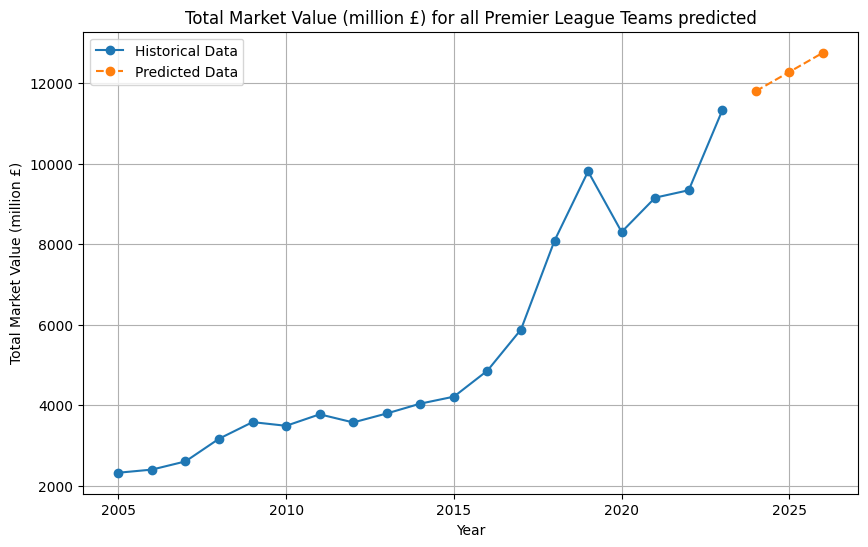

In [293]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(summary_df['Year'], summary_df['Total Market Value Sum'], marker='o', label='Historical Data')
plt.plot(future_df['Year'], future_df['Total Market Value Sum'], marker='o', linestyle='--', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Total Market Value (million £)')
plt.title('Total Market Value (million £) for all Premier League Teams predicted')
plt.legend()
plt.grid(True)
plt.show()


In [275]:
market_share_percentage_per_year[2023]

,Club,Market Share (%)
0,Manchester City,10.16
1,Arsenal,8.83
2,Chelsea,8.79
3,Manchester Utd,7.49
4,Liverpool,7.17
5,Tottenham,5.73
6,Newcastle Utd,4.78
7,Brighton,4.68
8,Aston Villa,4.50
9,Wolves,4.40


In [280]:
market_share_percentage_per_year[2023]

,Club,Market Share (%)
0,Manchester City,10.16
1,Arsenal,8.83
2,Chelsea,8.79
3,Manchester Utd,7.49
4,Liverpool,7.17
5,Tottenham,5.73
6,Newcastle Utd,4.78
7,Brighton,4.68
8,Aston Villa,4.50
9,Wolves,4.40


In [290]:

total_market_value_2026 =12751.380789

market_share_df = market_share_percentage_per_year[2023]
market_share_df["market_value_2026"] = (market_share_df['Market Share (%)'] / 100) * total_market_value_2026
print(market_share_df)

               Club  Market Share (%)  market_value_2026
0   Manchester City             10.16        1295.540288
1           Arsenal              8.83        1125.946924
2           Chelsea              8.79        1120.846371
3    Manchester Utd              7.49         955.078421
4         Liverpool              7.17         914.274003
5         Tottenham              5.73         730.654119
6     Newcastle Utd              4.78         609.516002
7          Brighton              4.68         596.764621
8       Aston Villa              4.50         573.812136
9            Wolves              4.40         561.060755
10   Leicester City              4.34         553.409926
11         West Ham              4.11         524.081750
12      Southampton              3.71         473.076227
13          Everton              3.65         465.425399
14  Nott'ham Forest              3.32         423.345842
15        Brentford              3.28         418.245290
16     Leeds United            

In [292]:

sponsorship_impact = {
    'Club': ['AFC Bournemouth', 'Aston Villa', 'Brentford', 'Burnley', 'Everton', 'Fulham', 'West Ham'],
    'Difference': [-5.6, -6.4, -4.4, -4.96, -6.0, -4.0, -7.2]
}

sponsorship_df = pd.DataFrame(sponsorship_impact)

sponsorship_df['Club'] = sponsorship_df['Club'].replace('AFC Bournemouth', 'Bournemouth')

adjusted_market_share_df = market_share_df.merge(sponsorship_df, on='Club', how='left')

adjusted_market_share_df['adjusted_market_value_2026'] = adjusted_market_share_df.apply(
    lambda row: row['market_value_2026'] + (3 * row['Difference']) if not pd.isna(row['Difference']) else row['market_value_2026'],
    axis=1
)

print(adjusted_market_share_df[['Club', 'Market Share (%)', 'market_value_2026', 'Difference', 'adjusted_market_value_2026']])

               Club  Market Share (%)  market_value_2026  Difference  \
0   Manchester City             10.16        1295.540288         NaN   
1           Arsenal              8.83        1125.946924         NaN   
2           Chelsea              8.79        1120.846371         NaN   
3    Manchester Utd              7.49         955.078421         NaN   
4         Liverpool              7.17         914.274003         NaN   
5         Tottenham              5.73         730.654119         NaN   
6     Newcastle Utd              4.78         609.516002         NaN   
7          Brighton              4.68         596.764621         NaN   
8       Aston Villa              4.50         573.812136        -6.4   
9            Wolves              4.40         561.060755         NaN   
10   Leicester City              4.34         553.409926         NaN   
11         West Ham              4.11         524.081750        -7.2   
12      Southampton              3.71         473.076227        

In [294]:

new_total_market_value_2026 = adjusted_market_share_df['adjusted_market_value_2026'].sum()

adjusted_market_share_df['adjusted_market_share (%)'] = (adjusted_market_share_df['adjusted_market_value_2026'] / new_total_market_value_2026) * 100

adjusted_market_share_df['squared_market_share'] = (adjusted_market_share_df['adjusted_market_share (%)'] ** 2)
HHI = adjusted_market_share_df['squared_market_share'].sum()

print(adjusted_market_share_df[['Club', 'Market Share (%)', 'market_value_2026', 'Difference', 'adjusted_market_value_2026', 'adjusted_market_share (%)']])
print(f"Herfindahl-Hirschman Index (HHI): {HHI}")

               Club  Market Share (%)  market_value_2026  Difference  \
0   Manchester City             10.16        1295.540288         NaN   
1           Arsenal              8.83        1125.946924         NaN   
2           Chelsea              8.79        1120.846371         NaN   
3    Manchester Utd              7.49         955.078421         NaN   
4         Liverpool              7.17         914.274003         NaN   
5         Tottenham              5.73         730.654119         NaN   
6     Newcastle Utd              4.78         609.516002         NaN   
7          Brighton              4.68         596.764621         NaN   
8       Aston Villa              4.50         573.812136        -6.4   
9            Wolves              4.40         561.060755         NaN   
10   Leicester City              4.34         553.409926         NaN   
11         West Ham              4.11         524.081750        -7.2   
12      Southampton              3.71         473.076227        

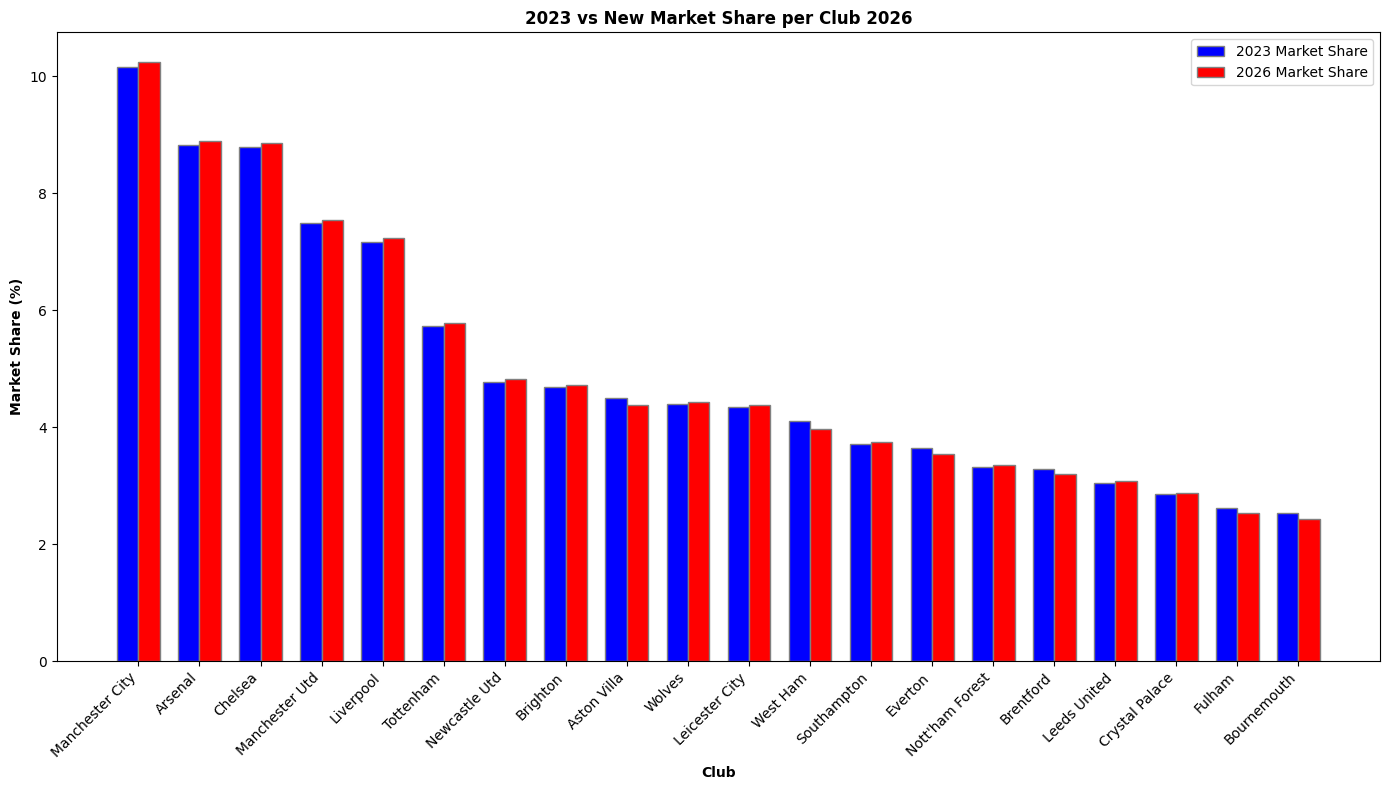

In [310]:

plt.figure(figsize=(14, 8))

bar_width = 0.35

r1 = range(len(adjusted_market_share_df))
r2 = [x + bar_width for x in r1]

plt.bar(r1, adjusted_market_share_df['Market Share (%)'], color='b', width=bar_width, edgecolor='grey', label='2023 Market Share')
plt.bar(r2, adjusted_market_share_df['adjusted_market_share (%)'], color='r', width=bar_width, edgecolor='grey', label='2026 Market Share')

plt.xlabel('Club', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(df))], adjusted_market_share_df['Club'], rotation=45, ha='right')
plt.ylabel('Market Share (%)', fontweight='bold')
plt.title('2023 vs New Market Share per Club 2026', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

In [297]:
subset_df = adjusted_market_share_df[['Club', 'adjusted_market_share (%)']].copy()
subset_df.columns = ['Club', 'Market Share (%)']  # Omnavngiv kolonnen for konsistens


In [298]:
subset_df

,Club,Market Share (%)
0,Manchester City,10.241987
1,Arsenal,8.901255
2,Chelsea,8.860932
3,Manchester Utd,7.550441
4,Liverpool,7.227859
5,Tottenham,5.776239
6,Newcastle Utd,4.818573
7,Brighton,4.717766
8,Aston Villa,4.384526
9,Wolves,4.435506


In [300]:

combined_df = subset_df

X_new = combined_df[['Market Share (%)']]

X_new = sm.add_constant(X_new)


Mean Squared Error: 85.16163735311436
R-squared: 0.7228469745937085
Root Mean Squared Error (RMSE): 9.228306310104491
               Club  Market Share (%)  Predicted Points
0   Manchester City         10.241987         75.546580
1           Arsenal          8.901255         69.604125
2           Chelsea          8.860932         69.425404
3    Manchester Utd          7.550441         63.616989
4         Liverpool          7.227859         62.187226
5         Tottenham          5.776239         55.753289
6     Newcastle Utd          4.818573         51.508678
7          Brighton          4.717766         51.061877
8       Aston Villa          4.384526         49.584878
9            Wolves          4.435506         49.810834
10   Leicester City          4.375022         49.542753
11         West Ham          3.972406         47.758259
12      Southampton          3.739938         46.727906
13          Everton          3.537154         45.829115
14  Nott'ham Forest          3.346791     

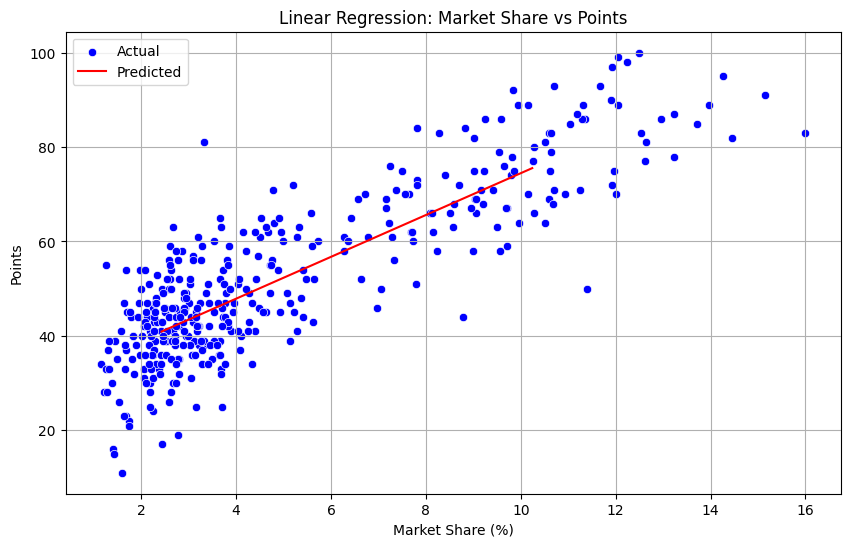

In [305]:

subset_df = adjusted_market_share_df[['Club', 'adjusted_market_share (%)']].copy()
subset_df.columns = ['Club', 'Market Share (%)']  

subset_df['Pts'] = np.random.randint(30, 100, size=len(subset_df))

data_frames = []
for season, df in points_market.items():
    df['Season'] = season  
    data_frames.append(df)

combined_df = pd.concat(data_frames, ignore_index=True)

X = combined_df[['Market Share (%)']]
y = combined_df['Pts']

reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

combined_df['Predicted Points'] = y_pred


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


X_new = subset_df[['Market Share (%)']]
subset_df['Predicted Points'] = reg.predict(X_new)

print(subset_df[['Club', 'Market Share (%)', 'Predicted Points']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market Share (%)', y='Pts', data=combined_df, color='blue', label='Actual')
sns.lineplot(x='Market Share (%)', y='Predicted Points', data=subset_df, color='red', label='Predicted')
plt.xlabel('Market Share (%)')
plt.ylabel('Points')
plt.title('Linear Regression: Market Share vs Points')
plt.legend()
plt.grid(True)
plt.show()


# Example on prediction for 2024

In [116]:
import pandas as pd

data_2024 = pd.DataFrame({
    'Club': [
        'Manchester City', 'Arsenal', 'Chelsea', 'Liverpool', 'Tottenham',
        'Manchester United', 'Aston Villa', 'Newcastle United', 'Brighton & Hove Albion', 'West Ham United',
        'Brentford', 'Crystal Palace', 'Nottingham Forest', 'AFC Bournemouth', 'Everton',
        'Wolverhampton Wanderers', 'Fulham', 'Burnley', 'Sheffield United', 'Luton Town'
    ],
    'Squad': [
        22, 25, 30, 28, 26, 27, 27, 28, 27, 23, 30, 28, 28, 26, 25, 27, 24, 29, 30, 29
    ],
    'Average Age': [
        26.9, 25.7, 23.6, 25.8, 25.7, 26.6, 26.4, 27.6, 25.6, 28.1, 25.8, 26.4, 27.1, 26.0, 27.3,
        27.0, 28.3, 25.2, 25.8, 27.7
    ],
    'Foreigners': [
        16, 18, 19, 21, 20, 19, 18, 13, 19, 14, 23, 13, 24, 17, 11, 20, 22, 22, 17, 16
    ],
    'Market Value (million £)': [
        57.74, 44.74, 30.94, 32.91, 29.90, 27.19, 23.93, 22.78, 18.71, 19.43, 14.20, 14.45, 13.20, 13.57, 13.82,
        13.60, 14.08, 8.83, 4.81, 4.33
    ],
    'Total Market Value (million £)': [
        1270.00, 1122.00, 928.30, 921.40, 777.30, 734.25, 646.20, 637.70, 505.10, 446.80, 426.08, 404.70, 369.65,
        352.80, 345.40, 339.90, 338.00, 256.10, 144.20, 125.50
    ]
})

data_2024


,Club,Squad,Average Age,Foreigners,Market Value (million £),Total Market Value (million £)
0,Manchester City,22,26.9,16,57.74,1270.00
1,Arsenal,25,25.7,18,44.74,1122.00
2,Chelsea,30,23.6,19,30.94,928.30
3,Liverpool,28,25.8,21,32.91,921.40
4,Tottenham,26,25.7,20,29.90,777.30
5,Manchester United,27,26.6,19,27.19,734.25
6,Aston Villa,27,26.4,18,23.93,646.20
7,Newcastle United,28,27.6,13,22.78,637.70
8,Brighton & Hove Albion,27,25.6,19,18.71,505.10
9,West Ham United,23,28.1,14,19.43,446.80


In [118]:
data_2024_opdelt = data_2024[['Club', 'Total Market Value (million £)']]
print(data_2024_opdelt)

                       Club  Total Market Value (million £)
0           Manchester City                         1270.00
1                   Arsenal                         1122.00
2                   Chelsea                          928.30
3                 Liverpool                          921.40
4                 Tottenham                          777.30
5         Manchester United                          734.25
6               Aston Villa                          646.20
7          Newcastle United                          637.70
8    Brighton & Hove Albion                          505.10
9           West Ham United                          446.80
10                Brentford                          426.08
11           Crystal Palace                          404.70
12        Nottingham Forest                          369.65
13          AFC Bournemouth                          352.80
14                  Everton                          345.40
15  Wolverhampton Wanderers             

In [123]:

total_market_value = data_2024_opdelt['Total Market Value (million £)'].sum()

data_2024_opdelt['Market Share (%)'] = (data_2024_opdelt['Total Market Value (million £)'] / total_market_value) * 100

data_2024_opdelt

C:\Users\andre\AppData\Local\Temp\ipykernel_15008\2707018020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024_opdelt['Market Share (%)'] = (data_2024_opdelt['Total Market Value (million £)'] / total_market_value) * 100


,Club,Total Market Value (million £),Market Share (%)
0,Manchester City,1270.00,11.450334
1,Arsenal,1122.00,10.115964
2,Chelsea,928.30,8.369563
3,Liverpool,921.40,8.307352
4,Tottenham,777.30,7.008145
5,Manchester United,734.25,6.620006
6,Aston Villa,646.20,5.826146
7,Newcastle United,637.70,5.749510
8,Brighton & Hove Albion,505.10,4.553987
9,West Ham United,446.80,4.028354


In [125]:
data_2024_klar = data_2024_opdelt[['Club', 'Market Share (%)']]

,Club,Market Share (%)
0,Manchester City,11.450334
1,Arsenal,10.115964
2,Chelsea,8.369563
3,Liverpool,8.307352
4,Tottenham,7.008145
5,Manchester United,6.620006
6,Aston Villa,5.826146
7,Newcastle United,5.749510
8,Brighton & Hove Albion,4.553987
9,West Ham United,4.028354


In [127]:

season2023 = data_2024_klar
X_new = data_2024_klar[['Market Share (%)']]


dnew = xgb.DMatrix(X_new)

predicted_points = model.predict(dnew)

data_2024_klar['Predicted Pts'] = predicted_points

In [128]:
data_2024_klar

,Club,Market Share (%),Predicted Pts
0,Manchester City,11.450334,73.511360
1,Arsenal,10.115964,74.175377
2,Chelsea,8.369563,69.871719
3,Liverpool,8.307352,69.871719
4,Tottenham,7.008145,57.414375
5,Manchester United,6.620006,59.066238
6,Aston Villa,5.826146,58.609921
7,Newcastle United,5.749510,58.609921
8,Brighton & Hove Albion,4.553987,54.197605
9,West Ham United,4.028354,47.437866


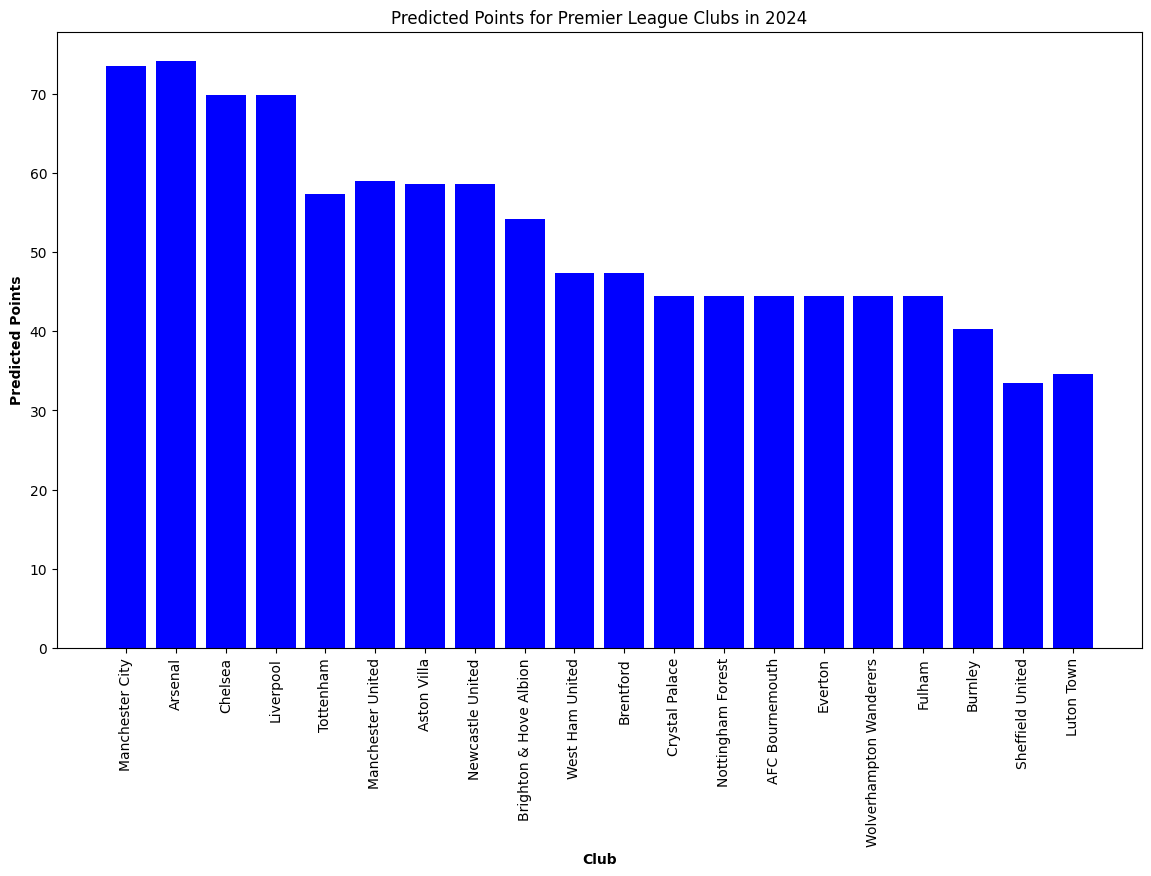

In [129]:
plt.figure(figsize=(14, 8))
clubs = data_2024_klar['Club']
predicted_points = data_2024_klar['Predicted Pts']

plt.bar(clubs, predicted_points, color='blue')

plt.xlabel('Club', fontweight='bold')
plt.ylabel('Predicted Points', fontweight='bold')
plt.title('Predicted Points for Premier League Clubs in 2024')

plt.xticks(rotation=90) 

plt.show()


In [46]:
#Spanien:

In [48]:
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003]  # Liste over de år, du vil hente data for

dataframes = {}

for year in years:
    try:
        data = scraper.scrape_league_table(year, 'La Liga')
        dataframes[str(year)] = data 
    except Exception as e:
        print(f"Der opstod en fejl ved indhentning af data for {year}: {e}")

print(dataframes['2022'])

Scraping 2023 La Liga league table
Scraping 2022 La Liga league table
Scraping 2021 La Liga league table
Scraping 2020 La Liga league table
Scraping 2019 La Liga league table
Scraping 2018 La Liga league table
Scraping 2017 La Liga league table
Scraping 2016 La Liga league table
Scraping 2015 La Liga league table
Scraping 2014 La Liga league table
Scraping 2013 La Liga league table
Scraping 2012 La Liga league table
Scraping 2011 La Liga league table
Scraping 2010 La Liga league table
Scraping 2009 La Liga league table
Scraping 2008 La Liga league table
Scraping 2007 La Liga league table
Scraping 2006 La Liga league table
Scraping 2005 La Liga league table
Scraping 2004 La Liga league table
Scraping 2003 La Liga league table
    Rk            Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
0    1      Real Madrid  38  26   8   4  80  31  49   86    2.26  71.7  43.9   
1    2        Barcelona  38  21  10   7  68  38  30   73    1.92  63.4  34.4   
2    3  Atlético Madrid  

In [49]:

filtered_dataframes = {}

for year, df in dataframes.items():
    filtered_dataframes[year] = df[['Squad', 'Pts']]

print(filtered_dataframes['2010'])

              Squad  Pts
0         Barcelona   99
1       Real Madrid   96
2          Valencia   71
3           Sevilla   63
4          Mallorca   62
5            Getafe   58
6        Villarreal   56
7     Athletic Club   54
8   Atlético Madrid   47
9         La Coruña   47
10         Espanyol   44
11          Osasuna   43
12          Almería   42
13         Zaragoza   41
14   Sporting Gijón   40
15      Racing Sant   39
16           Málaga   37
17       Valladolid   36
18         Tenerife   36
19            Xerez   34


In [50]:
hhicb_data = []

for year, df in filtered_dataframes.items():
    df_copy = df.copy()
    total_points = df_copy['Pts'].sum()
    df_copy.loc[:, 'pi'] = df_copy['Pts'] / total_points
    hhicb = len(df_copy) * (df_copy['pi']**2).sum()
    hhicb_data.append({'Year': year, 'HHICB': hhicb})

hhicb_df = pd.DataFrame(hhicb_data)

hhicb_df = hhicb_df.sort_values('Year').reset_index(drop=True)

print(hhicb_df)


    Year     HHICB
0   2003  1.057686
1   2004  1.054390
2   2005  1.072448
3   2006  1.076357
4   2007  1.063472
5   2008  1.069562
6   2009  1.071686
7   2010  1.120359
8   2011  1.094925
9   2012  1.097361
10  2013  1.107345
11  2014  1.114396
12  2015  1.152858
13  2016  1.113389
14  2017  1.146351
15  2018  1.113640
16  2019  1.069281
17  2020  1.092301
18  2021  1.113776
19  2022  1.083354
20  2023  1.086782


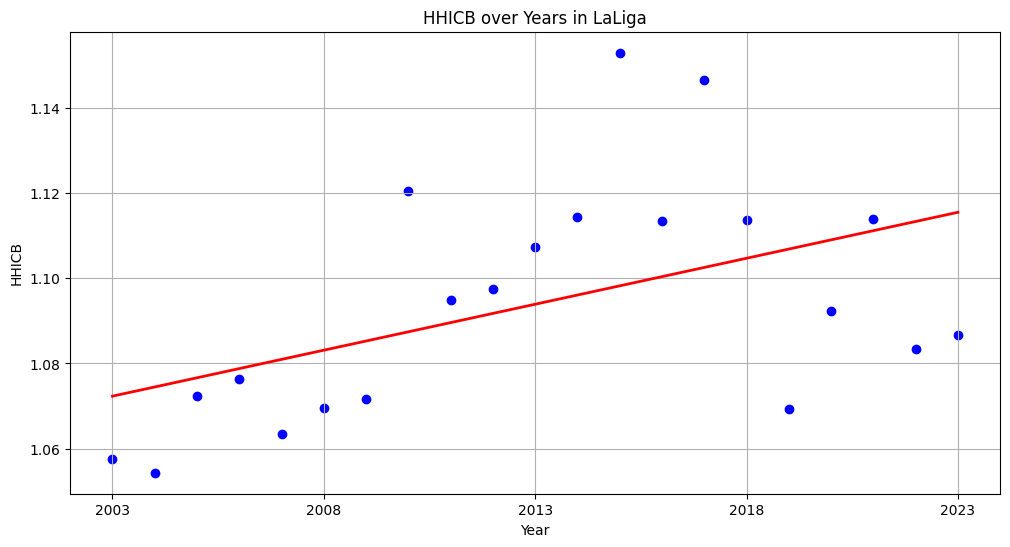

In [51]:

xticks = hhicb_df['Year'][::5]

plt.figure(figsize=(12, 6))
plt.scatter(hhicb_df['Year'], hhicb_df['HHICB'], color='blue')

X = hhicb_df['Year'].values.reshape(-1, 1)  
y = hhicb_df['HHICB'].values
model = LinearRegression().fit(X, y)
trendline = model.predict(X)

plt.plot(hhicb_df['Year'], trendline, color='red', linewidth=2)

plt.title('HHICB over Years in LaLiga')
plt.xlabel('Year')
plt.ylabel('HHICB')
plt.xticks(ticks=xticks) 
plt.grid(True)
plt.show()

In [27]:
# Used to try to gather market values from clubs in Laliga.
from bs4 import BeautifulSoup

file_path = "C:/Users/andre/Desktop/LaLiga 22_23 _ Transfermarkt.html"
with open(file_path, "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

table = soup.find('table', {'class': 'items'})

if table is None:
    print("Kunne ikke finde den rigtige tabel.")
else:
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    rows = []
    for row in table.find('tbody').find_all('tr'):
        cells = row.find_all(['td', 'th'])
        cells_text = [cell.get_text(strip=True) for cell in cells]
        rows.append(cells_text)

    df = pd.DataFrame(rows, columns=headers)

    print(df)


   Club                    name Squad ø age Foreigners ø market value  \
0                   Real Madrid    36  25.4         20        €25.65m   
1                  FC Barcelona    41  24.0         14        €20.41m   
2            Atlético de Madrid    40  25.4         22        €13.36m   
3                 Real Sociedad    37  24.5          6        €11.94m   
4                 Villarreal CF    43  25.8         15         €8.45m   
5                   Valencia CF    40  24.0         18         €6.24m   
6           Real Betis Balompié    38  27.1         13         €6.48m   
7                    Sevilla FC    42  26.3         23         €5.54m   
8               Athletic Bilbao    31  26.6          1         €7.18m   
9                    CA Osasuna    31  26.7          4         €4.84m   
10                    Girona FC    37  25.1         13         €3.78m   
11                Celta de Vigo    36  25.2         12         €3.86m   
12                    Getafe CF    34  26.0        